In [ ]:
import os
from PIL import Image

# Path to processed images
image_folder = "C:/rsna_dataset/processed_images/train"

# List all images
image_files = [f for f in os.listdir(image_folder) if f.endswith(".png")]

# Check number of images
print(f"Total PNG images found: {len(image_files)}")

# Display example images
example_images = image_files[:5]
print(f"Example image names: {example_images}")

# Check image properties
for img_name in example_images:
    img_path = os.path.join(image_folder, img_name)
    with Image.open(img_path) as img:
        print(f"{img_name}: Size={img.size}, Mode={img.mode}")


In [1]:
import os
image_folder = r"D:\rsna_dataset\processed_images\train"
print("Total images found:", len(os.listdir(image_folder)))


Total images found: 26684


In [2]:
import cv2
import os
from tqdm import tqdm

# Paths
image_folder = r"D:\rsna_dataset\processed_images\train"
output_folder = r"D:\rsna_dataset\processed_images\train_resized"
os.makedirs(output_folder, exist_ok=True)

# Get list of images
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# Process images
for img_name in tqdm(image_files, desc="Resizing Images"):
    img_path = os.path.join(image_folder, img_name)
    save_path = os.path.join(output_folder, img_name)

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Skipping {img_name}, cannot read!")
        continue

    img_resized = cv2.resize(img, (640, 640), interpolation=cv2.INTER_AREA)  # Resize to 640x640
    cv2.imwrite(save_path, img_resized)

print(f"✅ Resizing complete! Saved in: {output_folder}")


Resizing Images: 100%|███████████████████████████████████████████████████████████| 26684/26684 [07:51<00:00, 56.57it/s]

✅ Resizing complete! Saved in: D:\rsna_dataset\processed_images\train_resized


In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Paths
input_folder = r"D:\rsna_dataset\processed_images\train_segmented"
output_folder = r"D:\rsna_dataset\processed_images\train_normalized"

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Function to normalize images
def normalize_image(image):
    image = image.astype(np.float32)  # Convert to float for normalization
    image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)  # Normalize to [0, 1]
    image = (image * 255).astype(np.uint8)  # Convert back to uint8
    return image

# Process images
for img_name in tqdm(os.listdir(input_folder), desc="Normalizing Images"):
    img_path = os.path.join(input_folder, img_name)
    output_path = os.path.join(output_folder, img_name)

    # Read the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Skipping {img_name}, unable to read.")
        continue

    # Normalize image
    normalized_img = normalize_image(img)

    # Save the normalized image
    cv2.imwrite(output_path, normalized_img)

print(f"✅ Normalization complete! Saved in: {output_folder}")


Normalizing Images: 100%|████████████████████████████████████████████████████████| 26684/26684 [06:49<00:00, 65.19it/s]

✅ Normalization complete! Saved in: D:\rsna_dataset\processed_images\train_normalized


In [2]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm

# Paths
input_folder = r"D:\rsna_dataset\processed_images\train_normalized"   # Input: Normalized images
output_folder = r"D:\rsna_dataset\processed_images\train_augmented"  # Output: Augmented images
os.makedirs(output_folder, exist_ok=True)

# Define Augmentations
transform = A.Compose([
    A.Rotate(limit=15, p=0.5),  # Rotate by ±15°
    A.HorizontalFlip(p=0.5),    # Randomly flip horizontally
    A.RandomScale(scale_limit=0.1, p=0.5),  # Scale ±10%
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),  # Adjust brightness/contrast
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),  # Mild blur
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),  # Add noise
    A.MultiplicativeNoise(multiplier=(0.9, 1.1), p=0.3)  # Simulates opacity variations
])

# Process Images
for img_name in tqdm(os.listdir(input_folder), desc="Applying Augmentations"):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Convert to RGB (Albumentations requires 3 channels)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Apply augmentations
    augmented = transform(image=img_rgb)['image']

    # Convert back to grayscale
    augmented_gray = cv2.cvtColor(augmented, cv2.COLOR_RGB2GRAY)

    # Save augmented image
    cv2.imwrite(os.path.join(output_folder, img_name), augmented_gray)

print(f"✅ Augmentation complete! Images saved in: {output_folder}")


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
C:\Users\user\AppData\Local\Temp\ipykernel_288\3747732884.py:19: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),  # Add noise
Applying Augmentations: 100%|████████████████████████████████████████████████████| 26684/26684 [14:56<00:00, 29.76it/s]

✅ Augmentation complete! Images saved in: D:\rsna_dataset\processed_images\train_augmented


In [10]:
import os
import pandas as pd

# Define path to augmented images
image_folder = r"D:/rsna_dataset/processed_images/train_augmented"

# Get all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# Extract class labels (assuming filenames contain "Pneumonia" or are Normal by default)
labels = ["Pneumonia" if "Pneumonia" in img else "Normal" for img in image_files]

# Create DataFrame
df = pd.DataFrame({"image_path": image_files, "class": labels})

# Check class distribution
print("Class Distribution:")
print(df["class"].value_counts())


Class Distribution:
Series([], Name: count, dtype: int64)


In [11]:
import os

image_folder = r"D:/rsna_dataset/processed_images/train_augmented"

# List first 10 image files
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# Print results
print(f"Total images found: {len(image_files)}")
print("Sample images:", image_files[:10])


Total images found: 0
Sample images: []


In [12]:
import os

image_folder = r"D:/rsna_dataset/processed_images/train_augmented"

# List first 10 image files
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# Print sample filenames
print("Sample Filenames:", image_files[:10])


Sample Filenames: []


In [13]:
import os

# Correct folder path
image_folder = r"D:/rsna_dataset/processed_images/train_augmented"

# List only JPG images
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

print(f"Total JPG images found: {len(image_files)}")

# Print first 10 filenames to confirm
print("Sample Filenames:", image_files[:10])


Total JPG images found: 26684
Sample Filenames: ['0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg', '000924cf-0f8d-42bd-9158-1af53881a557.jpg', '000db696-cf54-4385-b10b-6b16fbb3f985.jpg', '000fe35a-2649-43d4-b027-e67796d412e0.jpg', '001031d9-f904-4a23-b3e5-2c088acd19c6.jpg', '0010f549-b242-4e94-87a8-57d79de215fc.jpg', '001916b8-3d30-4935-a5d1-8eaddb1646cd.jpg', '0022073f-cec8-42ec-ab5f-bc2314649235.jpg', '0022995a-45eb-4cfa-9a59-cd15f5196c64.jpg', '0025d2de-bd78-4d36-9f72-e15a5e22ca82.jpg']


In [21]:
import os
import pandas as pd

# Paths
augmented_folder = r"D:\rsna_dataset\processed_images\train_augmented"
train_labels_csv = r"D:\rsna_dataset\rsna-pneumonia-detection-challenge\stage_2_train_labels.csv"
output_csv = r"D:\rsna_dataset\processed_images\final_dataset.csv"

# Load original labels
df_labels = pd.read_csv(train_labels_csv)
df_labels = df_labels[['patientId', 'Target']]  # Keep only needed columns
df_labels.columns = ['filename', 'class']  # Rename for consistency
df_labels['filename'] = df_labels['filename'] + ".jpg"  # Match augmented filenames
df_labels['class'] = df_labels['class'].map({0: 'Normal', 1: 'Pneumonia'})  # Convert labels

# Get augmented image filenames
augmented_images = os.listdir(augmented_folder)
df_augmented = pd.DataFrame({'filename': augmented_images})

# Merge with labels
df_final = df_augmented.merge(df_labels, on='filename', how='left')

# Remove any missing labels (if augmentation added extra images)
df_final = df_final.dropna()

# Save final dataset
df_final.to_csv(output_csv, index=False)
print(f"✅ Final dataset saved: {output_csv}")
print(df_final['class'].value_counts())  # Check class distribution


✅ Final dataset saved: D:\rsna_dataset\processed_images\final_dataset.csv
class
Normal       20672
Pneumonia     9555
Name: count, dtype: int64


In [22]:
from sklearn.utils import resample
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\rsna_dataset\processed_images\final_dataset.csv")

# Separate classes
df_normal = df[df["class"] == "Normal"]
df_pneumonia = df[df["class"] == "Pneumonia"]

# Oversample Pneumonia to match Normal count
df_pneumonia_oversampled = resample(df_pneumonia, replace=True, n_samples=len(df_normal), random_state=42)

# Combine back
df_balanced = pd.concat([df_normal, df_pneumonia_oversampled])

# Save balanced dataset
balanced_csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset.csv"
df_balanced.to_csv(balanced_csv_path, index=False)

# Check new distribution
print(f"✅ Balanced dataset saved: {balanced_csv_path}")
print(df_balanced["class"].value_counts())  # Verify balancing


✅ Balanced dataset saved: D:\rsna_dataset\processed_images\final_balanced_dataset.csv
class
Normal       20672
Pneumonia    20672
Name: count, dtype: int64


In [23]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Load the final balanced dataset
csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset.csv"
df = pd.read_csv(csv_path)

# Split into 80% Train, 20% Validation
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["class"], random_state=42)

# Save the splits
train_csv = r"D:\rsna_dataset\processed_images\train_split.csv"
val_csv = r"D:\rsna_dataset\processed_images\val_split.csv"

train_df.to_csv(train_csv, index=False)
val_df.to_csv(val_csv, index=False)

print(f"✅ Train set saved: {train_csv} ({len(train_df)} samples)")
print(f"✅ Validation set saved: {val_csv} ({len(val_df)} samples)")


✅ Train set saved: D:\rsna_dataset\processed_images\train_split.csv (33075 samples)
✅ Validation set saved: D:\rsna_dataset\processed_images\val_split.csv (8269 samples)


In [24]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os

# Paths
train_csv = r"D:\rsna_dataset\processed_images\train_split.csv"
val_csv = r"D:\rsna_dataset\processed_images\val_split.csv"
image_dir = r"D:\rsna_dataset\processed_images\train_normalized"

# Load CSVs
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)

# Image Transformations
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Custom Dataset Class
class PneumoniaDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        self.label_map = {"Normal": 0, "Pneumonia": 1}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.img_dir, img_name)

        image = Image.open(img_path).convert("RGB")
        label = self.label_map[self.dataframe.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label

# Create Datasets
train_dataset = PneumoniaDataset(train_df, image_dir, transform=train_transform)
val_dataset = PneumoniaDataset(val_df, image_dir, transform=val_transform)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"✅ Train DataLoader: {len(train_loader)} batches")
print(f"✅ Validation DataLoader: {len(val_loader)} batches")


✅ Train DataLoader: 1034 batches
✅ Validation DataLoader: 259 batches


In [25]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load Pretrained DenseNet121
class PneumoniaModel(nn.Module):
    def __init__(self):
        super(PneumoniaModel, self).__init__()
        self.model = models.densenet121(pretrained=True)
        
        # Modify the classifier for binary classification
        num_ftrs = self.model.classifier.in_features
        self.model.classifier = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Linear(512, 2)  # 2 classes: Normal, Pneumonia
        )

    def forward(self, x):
        return self.model(x)

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PneumoniaModel().to(device)

print("✅ Model loaded successfully!")


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\user/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|███████████████████████

✅ Model loaded successfully!


In [1]:
import pandas as pd
import os
from tqdm import tqdm

# Path to dataset
csv_path = r"D:\rsna_dataset\rsna-pneumonia-detection-challenge\stage_2_train_labels.csv"
images_dir = r"D:\rsna_dataset\processed_images\train_normalized"  # Normalized images folder
output_labels_dir = r"D:\rsna_dataset\processed_images\yolo_labels"

# Create labels directory
os.makedirs(output_labels_dir, exist_ok=True)

# Load CSV
df = pd.read_csv(csv_path)

# Normalize bounding boxes to YOLO format
def convert_to_yolo_format(row, img_w=1024, img_h=1024):
    x_min, y_min, width, height = row["x"], row["y"], row["width"], row["height"]
    x_center = (x_min + width / 2) / img_w
    y_center = (y_min + height / 2) / img_h
    width = width / img_w
    height = height / img_h
    return f"0 {x_center} {y_center} {width} {height}"  # "0" is the class (Pneumonia)

# Process each image with a progress bar
for img_id, group in tqdm(df.groupby("patientId"), desc="Converting Labels", unit="file"):
    txt_filename = os.path.join(output_labels_dir, f"{img_id}.txt")
    
    with open(txt_filename, "w") as f:
        for _, row in group.iterrows():
            if row["Target"] == 1:  # Only process pneumonia cases
                yolo_bbox = convert_to_yolo_format(row)
                f.write(yolo_bbox + "\n")

print(f"✅ YOLO labels saved in: {output_labels_dir}")



Converting Labels: 100%|█████████████████████████████████████████████████████| 26684/26684 [00:06<00:00, 4061.59file/s]

✅ YOLO labels saved in: D:\rsna_dataset\processed_images\yolo_labels


In [2]:
import yaml

# Define YOLO dataset configuration
dataset_config = {
    "path": "D:/rsna_dataset/processed_images/yolo_labels",  # Path to dataset
    "train": "images/train",  # Train images folder
    "val": "images/val",  # Validation images folder
    "nc": 1,  # Number of classes (Only Pneumonia)
    "names": ["Pneumonia"]
}

# Save YAML file
yaml_file_path = "D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml"

with open(yaml_file_path, "w") as yaml_file:
    yaml.dump(dataset_config, yaml_file, default_flow_style=False)

print(f"✅ YOLO dataset.yaml created at: {yaml_file_path}")


✅ YOLO dataset.yaml created at: D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml


In [4]:
import torch

# Check available GPU memory
gpu_memory = torch.cuda.get_device_properties(0).total_memory / (1024 ** 3)  # Convert to GB

if gpu_memory >= 24:
    batch_size = 64
elif gpu_memory >= 12:
    batch_size = 32
elif gpu_memory >= 8:
    batch_size = 16
elif gpu_memory >= 6:
    batch_size = 8
else:
    batch_size = 4  # CPU or low VRAM GPU

print(f"🔥 Optimal Batch Size: {batch_size}")


AssertionError: Torch not compiled with CUDA enabled

In [5]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is working
print(torch.version.cuda)  # Check installed CUDA version
print(torch.backends.cudnn.version())  # Check cuDNN version


False
None
None


In [6]:
!pip install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio==2.1.0+cu118 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 5.6 MB/s eta 0:08:09
     ---------------------------------------- 0.0/2.7 GB 7.4 MB/s eta 0:06:06
     ---------------------------------------- 0.0/2.7 GB 6.5 MB/s eta 0:07:00
     ---------------------------------------- 0.0/2.7 GB 7.0 MB/s eta 0:06:28
     ---------------------------------------- 0.0/2.7 GB 7.2 MB/s eta 0:06:18
     ---------------------------------------- 0.0/2.7 GB 7.3 MB/s eta 0:06:13
     ---------------------------------------- 0.0/2.7 GB 7.3 MB/s eta 0:06:13
     ---------------------------------------- 0.0/2.7 GB 7.6 MB/s eta 0:05:59
     ---------------------------------------- 0.0/2.7 GB 7.2 MB/s eta 0:06:19
     ---------------------------------------- 0.0/2.7 GB 7.2 MB/s eta 0:06:16
     ---------------------------------------- 0.0/2.7 GB 7.2 MB/s eta 0:06:14
     -------

ERROR: Could not find a version that satisfies the requirement torchvision==0.16.0+cu118 (from versions: none)
ERROR: No matching distribution found for torchvision==0.16.0+cu118


In [7]:
!pip uninstall torch torchvision torchaudio -y


In [8]:
import torch

print("✅ PyTorch Version:", torch.__version__)
print("✅ CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("✅ CUDA Device:", torch.cuda.get_device_name(0))


✅ PyTorch Version: 2.6.0+cpu
✅ CUDA Available: False


In [9]:
import torch

print("✅ PyTorch Version:", torch.__version__)
print("✅ CUDA Available:", torch.cuda.is_available())
print("✅ GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU available")
print("✅ CUDA Version:", torch.version.cuda)


✅ PyTorch Version: 2.6.0+cpu
✅ CUDA Available: False
✅ GPU Name: No GPU available
✅ CUDA Version: None


In [11]:
import os

def print_folders_only(root_dir, indent=''):
    for item in os.listdir(root_dir):
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):
            print(f"{indent}📁 {item}/")
            print_folders_only(item_path, indent + '    ')

root_directory = r'D:\rsna_dataset\processed_images'
print(f"📂 Root: {root_directory}")
print_folders_only(root_directory)


📂 Root: D:\rsna_dataset\processed_images
📁 train/
📁 train_augmented/
📁 train_normalized/
📁 train_segmented/
📁 yolo_labels/
    📁 images/
        📁 train/
        📁 val/
    📁 labels/
        📁 train/
        📁 val/


In [13]:
import pandas as pd
import os

base_path = 'D:/rsna_dataset/processed_images'
csv_files = ['final_balanced_dataset.csv', 'final_dataset.csv', 'train_split.csv', 'val_split.csv']

for csv_file in csv_files:
    file_path = os.path.join(base_path, csv_file)
    if os.path.exists(file_path):
        print(f"\n📄 Preview of '{csv_file}':")
        df = pd.read_csv(file_path)
        display(df.head())  # This shows the first few rows nicely in Jupyter
    else:
        print(f"❌ File not found: {csv_file}")



📄 Preview of 'final_balanced_dataset.csv':


,filename,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg,Normal
1,000924cf-0f8d-42bd-9158-1af53881a557.jpg,Normal
2,0010f549-b242-4e94-87a8-57d79de215fc.jpg,Normal
3,0022995a-45eb-4cfa-9a59-cd15f5196c64.jpg,Normal
4,0025d2de-bd78-4d36-9f72-e15a5e22ca82.jpg,Normal



📄 Preview of 'final_dataset.csv':


,filename,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg,Normal
1,000924cf-0f8d-42bd-9158-1af53881a557.jpg,Normal
2,000db696-cf54-4385-b10b-6b16fbb3f985.jpg,Pneumonia
3,000db696-cf54-4385-b10b-6b16fbb3f985.jpg,Pneumonia
4,000fe35a-2649-43d4-b027-e67796d412e0.jpg,Pneumonia



📄 Preview of 'train_split.csv':


,filename,class
0,18456077-bc39-4a63-8120-e750857d9263.jpg,Normal
1,3594b48f-fcc1-4947-93f5-64be66467147.jpg,Pneumonia
2,9a543e59-766e-4da2-82aa-a891682b2793.jpg,Pneumonia
3,e52bf7c3-8ee0-493b-9b62-fa99f8aa22c9.jpg,Normal
4,1561af3e-022a-448f-a729-2c4ba5546aa3.jpg,Normal



📄 Preview of 'val_split.csv':


,filename,class
0,fd2abc45-1971-43f7-a466-1cb3642a9b9f.jpg,Normal
1,522f994e-297f-4269-a931-71d098a083bf.jpg,Normal
2,a8541f49-c266-4abf-b56a-0182f869393d.jpg,Normal
3,707c724b-bc84-4e62-8a1e-195056b22f2a.jpg,Normal
4,cc118833-83a6-4f8f-ba7a-0e69faaaee72.jpg,Pneumonia


In [14]:
import os
import shutil
import pandas as pd
from tqdm import tqdm

# Paths
base_dir = 'D:/rsna_dataset/processed_images'
images_dir = os.path.join(base_dir, 'train_segmented')
csv_path = os.path.join(base_dir, 'final_dataset.csv')  # Contains filename and class

yolo_base = os.path.join(base_dir, 'yolo_labels')
images_out = {'train': os.path.join(yolo_base, 'images', 'train'),
              'val': os.path.join(yolo_base, 'images', 'val')}
labels_out = {'train': os.path.join(yolo_base, 'labels', 'train'),
              'val': os.path.join(yolo_base, 'labels', 'val')}

# Create directories
for path in list(images_out.values()) + list(labels_out.values()):
    os.makedirs(path, exist_ok=True)

# Load splits
train_df = pd.read_csv(os.path.join(base_dir, 'train_split.csv'))
val_df = pd.read_csv(os.path.join(base_dir, 'val_split.csv'))

# Load dataset with labels
df_labels = pd.read_csv(csv_path)
df_labels = df_labels[df_labels['class'] == 'Pneumonia']  # Only Pneumonia cases

# Dummy YOLO label (replace with actual bounding boxes later)
def create_yolo_label(filename):
    return "0 0.5 0.5 0.5 0.5\n"

def process_split(split_df, split_name):
    for _, row in tqdm(split_df.iterrows(), total=len(split_df), desc=f"Processing {split_name}"):
        fname = row['filename']
        label_row = df_labels[df_labels['filename'] == fname]
        src_img_path = os.path.join(images_dir, fname)
        dst_img_path = os.path.join(images_out[split_name], fname)
        dst_label_path = os.path.join(labels_out[split_name], fname.replace('.jpg', '.txt'))

        if os.path.exists(src_img_path):
            shutil.copy(src_img_path, dst_img_path)

        if not label_row.empty:
            with open(dst_label_path, 'w') as f:
                f.write(create_yolo_label(fname))

# Process both splits
process_split(train_df, 'train')
process_split(val_df, 'val')

print("✅ YOLO folder preparation completed.")


Processing val: 100%|█████████████████████████████████████████████████████████████| 8269/8269 [00:22<00:00, 366.83it/s]

✅ YOLO folder preparation completed.


In [1]:
device=0


In [6]:
from ultralytics import YOLO  # ✅ Import YOLO before using it

model = YOLO('yolov8n.pt')  # Use nano version to save memory

model.train(
    data="D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml",
    epochs=5,
    imgsz=640,
    batch=8,  # Lower batch size to fit in 4GB GPU
    device=0
)


New https://pypi.org/project/ultralytics/8.3.101 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

train: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\train.cache... 5422 images, 16537 backgrounds, 0 co


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\check_version.py:107: UserWarning: Error fetching version info The read operation timed out
  data = fetch_version_info()
val: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\val.cache... 2903 images, 4135 backgrounds, 0 corrupt


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.07G      1.504      3.607      1.654         10        640: 100%|██████████| 2745/2745 [13:37<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [02:


                   all       7038       2903      0.152      0.906      0.357      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.42G      1.305      1.981      1.455          1        640: 100%|██████████| 2745/2745 [18:33<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.637      0.811      0.714      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.43G      1.136      1.802      1.347          5        640: 100%|██████████| 2745/2745 [10:18<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903       0.65      0.619      0.651      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.43G     0.9969      1.728      1.259          5        640: 100%|██████████| 2745/2745 [10:22<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.638      0.824      0.745      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.43G     0.8601      1.625      1.187          3        640: 100%|██████████| 2745/2745 [10:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.671      0.787      0.744      0.622



5 epochs completed in 1.181 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.638      0.824      0.744      0.644
Speed: 0.4ms preprocess, 5.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E174F078D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [9]:
model = YOLO("runs/detect/train3/weights/best.pt")
results = model("E:/train/1.png", show=True, conf=0.5)



image 1/1 E:\train\1.png: 640x640 (no detections), 64.0ms
Speed: 8.5ms preprocess, 64.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [12]:

model = YOLO("runs/detect/train3/weights/best.pt")
results = model("E:/train/ff9d37d1-3660-4187-8f57-d31f9c91a3fd.png", show=True, conf=0.5)


image 1/1 E:\train\ff9d37d1-3660-4187-8f57-d31f9c91a3fd.png: 640x640 (no detections), 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
from ultralytics import YOLO

# Automatically resumes from last training run (runs/detect/train/weights/last.pt)
model = YOLO("runs/detect/train/weights/last.pt")

model.train(
    resume=True,  # 👈 This tells YOLO to resume full training state
)


New https://pypi.org/project/ultralytics/8.3.102 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train\weights\last.pt, data=D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

train: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\train.cache... 5422 images, 16537 backgrounds, 0 co


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\val.cache... 2903 images, 4135 backgrounds, 0 corrupt


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training runs\detect\train\weights\last.pt from epoch 33 to 50 total epochs
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.07G     0.5659       1.33      1.025         10        640: 100%|██████████| 2745/2745 [10:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.703      0.813      0.808      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.42G     0.5734      1.316      1.032          1        640: 100%|██████████| 2745/2745 [12:50<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [02:

                   all       7038       2903        0.7      0.817      0.807      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.42G     0.5347       1.38      1.015          2        640:  13%|█▎        | 348/2745 [02:34<23:30, 

In [1]:
from ultralytics import YOLO

# Automatically resumes from last training run (runs/detect/train/weights/last.pt)
model = YOLO("runs/detect/train/weights/last.pt")

model.train(
    resume=True,  # 👈 This tells YOLO to resume full training state
)


Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train\weights\last.pt, data=D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

train: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\train.cache... 5422 images, 16537 backgrounds, 0 co


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\check_version.py:107: UserWarning: Error fetching version info <urlopen error _ssl.c:989: The handshake operation timed out>
  data = fetch_version_info()


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO

# Automatically resumes from last training run (runs/detect/train/weights/last.pt)
model = YOLO("runs/detect/train/weights/last.pt")

model.train(
    resume=True,  # 👈 This tells YOLO to resume full training state
)

New https://pypi.org/project/ultralytics/8.3.102 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train\weights\last.pt, data=D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

train: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\train.cache... 5422 images, 16537 backgrounds, 0 co


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\val.cache... 2903 images, 4135 backgrounds, 0 corrupt


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training runs\detect\train\weights\last.pt from epoch 36 to 50 total epochs
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.07G     0.4971       1.27     0.9931         10        640: 100%|██████████| 2745/2745 [10:16<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.702      0.812      0.808      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.42G     0.5298      1.275      1.012          1        640: 100%|██████████| 2745/2745 [10:22<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.704      0.811      0.807      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.42G      0.528      1.314      1.012          5        640: 100%|██████████| 2745/2745 [10:15<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.706      0.809      0.807       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.42G     0.5304      1.356      1.008          5        640: 100%|██████████| 2745/2745 [10:18<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.705      0.812      0.808       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.42G     0.5227      1.354      1.008          1        640:   7%|▋         | 188/2745 [00:41<09:55, 

In [1]:
from ultralytics import YOLO

# Automatically resumes from last training run (runs/detect/train/weights/last.pt)
model = YOLO("runs/detect/train/weights/last.pt")

model.train(
    resume=True,  # 👈 This tells YOLO to resume full training state
)

Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train\weights\last.pt, data=D:/rsna_dataset/processed_images/yolo_labels/dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

train: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\train.cache... 5422 images, 16537 backgrounds, 0 co


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\check_version.py:107: UserWarning: Error fetching version info <urlopen error [Errno 11001] getaddrinfo failed>
  data = fetch_version_info()
val: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\val.cache... 2903 images, 4135 backgrounds, 0 corrupt


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training runs\detect\train\weights\last.pt from epoch 41 to 50 total epochs
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.07G     0.6067      1.437      1.167          1        640: 100%|██████████| 2745/2745 [10:17<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.699      0.822      0.813      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.41G     0.5662      1.385      1.125          2        640: 100%|██████████| 2745/2745 [10:09<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.701      0.821      0.811      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.41G     0.5539      1.384      1.114          0        640: 100%|██████████| 2745/2745 [10:12<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.691      0.814      0.803       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.41G     0.5323      1.353      1.101          1        640: 100%|██████████| 2745/2745 [10:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.684      0.801      0.794      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.41G     0.5368      1.352      1.108          3        640: 100%|██████████| 2745/2745 [10:00<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.688      0.789      0.794      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.41G     0.5432      1.335      1.115          0        640: 100%|██████████| 2745/2745 [10:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.688      0.786      0.795      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.41G      0.522      1.337      1.096          2        640: 100%|██████████| 2745/2745 [10:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.689      0.786      0.796      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.41G     0.5205      1.307      1.102          0        640: 100%|██████████| 2745/2745 [10:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903       0.69      0.786      0.797      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.41G     0.5211      1.308        1.1          2        640: 100%|██████████| 2745/2745 [10:00<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.689       0.79      0.797      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.41G     0.5206      1.304      1.093          2        640: 100%|██████████| 2745/2745 [09:58<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:

                   all       7038       2903      0.692      0.791      0.799       0.79



10 epochs completed in 1.903 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.702       0.82      0.811      0.796
Speed: 0.3ms preprocess, 5.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000018A455DC910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [5]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Load your trained YOLOv8 model
model = YOLO("runs/detect/train/weights/best.pt")  # Adjust path if needed

# Path to the test image
image_path = "D:/rsna_dataset/processed_images/train_segmented/06089341-a69b-4777-817b-041be894b436.jpg"

# Run inference on the image
results = model(image_path, conf=0.4)  # Set confidence threshold to 0.4

# Save the results (this will save to 'runs/detect/predict/')
results.save()

# Find the most recent saved prediction image
saved_path = sorted(Path("runs/detect/predict").glob("*.jpg"))[-1]

# Display the saved prediction image using matplotlib
img_result = Image.open(saved_path)
plt.imshow(img_result)
plt.axis('off')
plt.title("Pneumonia Detection")
plt.show()



image 1/1 D:\rsna_dataset\processed_images\train_segmented\06089341-a69b-4777-817b-041be894b436.jpg: 640x640 (no detections), 64.5ms
Speed: 6.2ms preprocess, 64.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'save'

In [6]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Load your trained YOLOv8 model
model = YOLO("runs/detect/train/weights/best.pt")  # Make sure this path is correct

# Path to the image you want to test
image_path = "D:/rsna_dataset/processed_images/train_segmented/06089341-a69b-4777-817b-041be894b436.jpg"

# Run inference (returns a list of results)
results = model(image_path, conf=0.4)

# Access the first result
result = results[0]

# Save the annotated image (creates runs/detect/predict/ folder if not already there)
result.save(filename="runs/detect/predict/06089341_prediction.jpg")

# Load and display the saved result
img_result = Image.open("runs/detect/predict/06089341_prediction.jpg")
plt.imshow(img_result)
plt.axis('off')
plt.title("Pneumonia Detection")
plt.show()



image 1/1 D:\rsna_dataset\processed_images\train_segmented\06089341-a69b-4777-817b-041be894b436.jpg: 640x640 (no detections), 64.6ms
Speed: 5.4ms preprocess, 64.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict/06089341_prediction.jpg'

In [7]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Image path
image_path = "D:/rsna_dataset/processed_images/train_segmented/06089341-a69b-4777-817b-041be894b436.jpg"

# Run detection
results = model(image_path, conf=0.4)

# Save the result (YOLO will automatically save it to runs/detect/predict/)
results[0].save()

# Locate the latest saved image in predict folder
predict_path = sorted(Path("runs/detect/predict").glob("*.jpg"))[-1]

# Show using matplotlib
img_result = Image.open(predict_path)
plt.imshow(img_result)
plt.axis('off')
plt.title("Pneumonia Detection")
plt.show()



image 1/1 D:\rsna_dataset\processed_images\train_segmented\06089341-a69b-4777-817b-041be894b436.jpg: 640x640 (no detections), 80.1ms
Speed: 5.9ms preprocess, 80.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


IndexError: list index out of range

In [9]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Load your trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Set path to the image you want to test
image_path = "D:/rsna_dataset/processed_images/train_segmented/031d627f-e6af-4588-8cca-6be8aa1222c7.jpg"

# Run detection
results = model(image_path, conf=0.4)

# Save the result to the default directory (runs/detect/predict/)
results[0].save()

# Get the prediction directory path
predict_dir = Path("runs/detect/predict")

# Check for image files
image_files = list(predict_dir.glob("*.jpg"))
if not image_files:
    print("❌ No predicted images were saved. Check if inference ran correctly.")
else:
    # Load the most recent image
    predict_path = sorted(image_files)[-1]
    
    # Display it
    img_result = Image.open(predict_path)
    plt.imshow(img_result)
    plt.axis('off')
    plt.title("Pneumonia Detection")
    plt.show()



image 1/1 D:\rsna_dataset\processed_images\train_segmented\031d627f-e6af-4588-8cca-6be8aa1222c7.jpg: 640x640 1 Pneumonia, 64.5ms
Speed: 6.1ms preprocess, 64.5ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)
❌ No predicted images were saved. Check if inference ran correctly.


In [10]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Load your trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to the test image
image_path = "D:/rsna_dataset/processed_images/train_segmented/031d627f-e6af-4588-8cca-6be8aa1222c7.jpg"

# Run inference with lower conf threshold to ensure detections are kept
results = model(image_path, conf=0.25)

# Save the annotated image
results[0].save(filename="prediction_result.jpg")  # Saves to current directory

# Load and show the saved image
img_result = Image.open("prediction_result.jpg")
plt.imshow(img_result)
plt.axis("off")
plt.title("Prediction Result - Pneumonia Detection")
plt.show()



image 1/1 D:\rsna_dataset\processed_images\train_segmented\031d627f-e6af-4588-8cca-6be8aa1222c7.jpg: 640x640 1 Pneumonia, 38.7ms
Speed: 6.2ms preprocess, 38.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


<Figure size 640x480 with 1 Axes>

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your model training results
model = YOLO("runs/detect/train/weights/best.pt")
model.val()  # This will print precision, recall, mAP

# Optionally: load and plot training metrics
import pandas as pd

results_path = "runs/detect/train/results.csv"
df = pd.read_csv(results_path)

plt.plot(df["metrics/mAP_0.5"], label="mAP@0.5")
plt.plot(df["metrics/precision(B)"], label="Precision")
plt.plot(df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Metric Score")
plt.title("Training Performance")
plt.legend()
plt.grid(True)
plt.show()


Ultralytics 8.3.94  Python-3.11.9 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\rsna_dataset\processed_images\yolo_labels\labels\val.cache... 2903 images, 4135 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 440/440 [01:


                   all       7038       2903      0.702       0.82      0.811      0.796
Speed: 0.4ms preprocess, 5.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\val


KeyError: 'metrics/mAP_0.5'

In [2]:
import pandas as pd

results_path = "runs/detect/train/results.csv"
df = pd.read_csv(results_path)

print(df.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv("runs/detect/train/results.csv")

# Plot training metrics
plt.figure(figsize=(10, 6))
plt.plot(df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["metrics/precision(B)"], label="Precision")
plt.plot(df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("YOLOv8 Pneumonia Detection - Training Metrics")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show best mAP@0.5 in percentage
best_map = df["metrics/mAP50(B)"].max() * 100
print(f"📈 Best mAP@0.5: {best_map:.2f}%")


<Figure size 1000x600 with 1 Axes>

📈 Best mAP@0.5: 81.25%


In [4]:
from ultralytics import YOLO
import pandas as pd
import os
from pathlib import Path

# Load model
model = YOLO("runs/detect/train/weights/best.pt")

# Load validation CSV with ground truths
val_df = pd.read_csv("D:/rsna_dataset/processed_images/val_split.csv")

# Folder where test images are stored
image_folder = Path("D:/rsna_dataset/processed_images/train_segmented")

# Tracking variables
correct = 0
total = 0

# Loop through each image in validation set
for index, row in val_df.iterrows():
    image_filename = row['filename']
    true_label = row['class']  # 'Normal' or 'Pneumonia'
    image_path = image_folder / image_filename

    if not image_path.exists():
        continue

    # Run detection
    results = model.predict(source=str(image_path), conf=0.4, verbose=False)

    # If any bounding box is predicted, we assume Pneumonia is detected
    predicted_label = 'Pneumonia' if len(results[0].boxes) > 0 else 'Normal'

    if predicted_label == true_label:
        correct += 1
    total += 1

    # Just test on a small batch first
    if total >= 50:  # Change this number for more/less testing
        break

# Calculate and print accuracy
accuracy = (correct / total) * 100
print(f"✅ Evaluated {total} images")
print(f"🎯 Accuracy: {accuracy:.2f}%")


✅ Evaluated 50 images
🎯 Accuracy: 72.00%


In [5]:
from ultralytics import YOLO
import pandas as pd
import os
from pathlib import Path

# Load model
model = YOLO("runs/detect/train/weights/best.pt")

# Load validation CSV with ground truths
val_df = pd.read_csv("D:/rsna_dataset/processed_images/val_split.csv")

# Folder where test images are stored
image_folder = Path("D:/rsna_dataset/processed_images/train_segmented")

# Tracking variables
correct = 0
total = 0

# Loop through each image in validation set
for index, row in val_df.iterrows():
    image_filename = row['filename']
    true_label = row['class']  # 'Normal' or 'Pneumonia'
    image_path = image_folder / image_filename

    if not image_path.exists():
        continue

    # Run detection
    results = model.predict(source=str(image_path), conf=0.4, verbose=False)

    # If any bounding box is predicted, we assume Pneumonia is detected
    predicted_label = 'Pneumonia' if len(results[0].boxes) > 0 else 'Normal'

    if predicted_label == true_label:
        correct += 1
    total += 1

    # Just test on a small batch first
    if total >= 50:  # Change this number for more/less testing
        break

# Calculate and print accuracy
accuracy = (correct / total) * 100
print(f"✅ Evaluated {total} images")
print(f"🎯 Accuracy: {accuracy:.2f}%")


✅ Evaluated 50 images
🎯 Accuracy: 72.00%


In [9]:
from ultralytics import YOLO
import pandas as pd
from pathlib import Path
from tqdm import tqdm  # ✅ for progress bar

# Load YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Load validation split
val_df = pd.read_csv("D:/rsna_dataset/processed_images/val_split.csv")

# Image folder
image_dir = Path("D:/rsna_dataset/processed_images/train_segmented")

# Track stats
correct = 0
total = 0
skipped = 0

# Progress bar over validation images
for _, row in tqdm(val_df.iterrows(), total=len(val_df), desc="🔍 Evaluating"):
    filename = row['filename']
    true_label = row['class']  # "Normal" or "Pneumonia"
    image_path = image_dir / filename

    if not image_path.exists():
        skipped += 1
        continue

    # Run prediction
    results = model.predict(source=str(image_path), conf=0.01, verbose=False)
    
    # Check for predictions
    predicted_label = "Pneumonia" if len(results[0].boxes) > 0 else "Normal"

    if predicted_label == true_label:
        correct += 1
    total += 1

# Show final accuracy
accuracy = (correct / total) * 100 if total > 0 else 0
print(f"\n✅ Evaluated {total} images ({skipped} skipped)")
print(f"🎯 Accuracy: {accuracy:.2f}%")


🔍 Evaluating: 100%|███████████████████████████████████████████████████████████████| 8269/8269 [02:17<00:00, 60.30it/s]


✅ Evaluated 8269 images (0 skipped)
🎯 Accuracy: 77.52%


In [10]:
from ultralytics import YOLO
import pandas as pd
from pathlib import Path
from tqdm import tqdm

# Load trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Path to segmented images
image_dir = Path("D:/rsna_dataset/processed_images/train_segmented")

# Load ground truth labels
labels_df = pd.read_csv("D:/rsna_dataset/processed_images/final_dataset.csv")
labels_df.set_index("filename", inplace=True)

# Get list of image paths (limit to 100)
image_paths = list(image_dir.glob("*.jpg"))[:100]

# Initialize counters
correct = 0
total = 0

# Process images with a progress bar
for img_path in tqdm(image_paths, desc="🔍 Evaluating", ncols=80):
    # Run prediction
    results = model.predict(source=img_path, conf=0.2, save=False, verbose=False)

    # Get ground truth
    true_label = labels_df.loc[img_path.stem, "class"]

    # YOLO predicts nothing (normal) if results[0].boxes is empty
    pred_boxes = results[0].boxes
    predicted_label = "Pneumonia" if len(pred_boxes) > 0 else "Normal"

    # Compare prediction
    if predicted_label == true_label:
        correct += 1
    total += 1

# Final accuracy
accuracy = (correct / total) * 100
print(f"\n✅ Evaluated {total} images")
print(f"🎯 Accuracy: {accuracy:.2f}%")


🔍 Evaluating:   0%|                                    | 0/100 [00:00<?, ?it/s]


KeyError: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'

In [11]:
from ultralytics import YOLO
import pandas as pd
from pathlib import Path
from tqdm import tqdm

# Load the model
model = YOLO("runs/detect/train/weights/best.pt")

# Load labels
labels_df = pd.read_csv("D:/rsna_dataset/processed_images/final_dataset.csv")
labels_df.set_index("filename", inplace=True)

# Path to images
image_dir = Path("D:/rsna_dataset/processed_images/train_segmented")
image_paths = list(image_dir.glob("*.jpg"))[:100]  # first 100 images

# Counters
correct = 0
total = 0
skipped = 0

# Evaluate with progress bar
for img_path in tqdm(image_paths, desc="🔍 Evaluating", ncols=80):
    filename = img_path.stem

    # Skip if ground truth label not available
    if filename not in labels_df.index:
        skipped += 1
        continue

    true_label = labels_df.loc[filename, "class"]

    # Predict
    results = model.predict(source=img_path, conf=0.2, save=False, verbose=False)
    pred_boxes = results[0].boxes
    predicted_label = "Pneumonia" if len(pred_boxes) > 0 else "Normal"

    if predicted_label == true_label:
        correct += 1
    total += 1

# Final report
accuracy = (correct / total) * 100 if total > 0 else 0
print(f"\n✅ Evaluated {total + skipped} images ({skipped} skipped)")
print(f"🎯 Accuracy on {total} matched images: {accuracy:.2f}%")


🔍 Evaluating: 100%|███████████████████████| 100/100 [00:00<00:00, 32904.24it/s]


✅ Evaluated 100 images (100 skipped)
🎯 Accuracy on 0 matched images: 0.00%


In [36]:
from ultralytics import YOLO
import pandas as pd
import os
from pathlib import Path

# Load model
model = YOLO("runs/detect/train/weights/best.pt")

# Load validation CSV with ground truths
val_df = pd.read_csv("D:/rsna_dataset/processed_images/val_split.csv")

# Folder where test images are stored
image_folder = Path("D:/rsna_dataset/processed_images/train_segmented")

# Tracking variables
correct = 0
total = 0

# Loop through each image in validation set
for index, row in val_df.iterrows():
    image_filename = row['filename']
    true_label = row['class']  # 'Normal' or 'Pneumonia'
    image_path = image_folder / image_filename

    if not image_path.exists():
        continue

    # Run detection
    results = model.predict(source=str(image_path), conf=0.11, verbose=False)

    # If any bounding box is predicted, we assume Pneumonia is detected
    predicted_label = 'Pneumonia' if len(results[0].boxes) > 0 else 'Normal'

    if predicted_label == true_label:
        correct += 1
    total += 1

    # Just test on a small batch first
    if total >= 50:  # Change this number for more/less testing
        break

# Calculate and print accuracy
accuracy = (correct / total) * 100
print(f"✅ Evaluated {total} images")
print(f"🎯 Accuracy: {accuracy:.2f}%")


✅ Evaluated 50 images
🎯 Accuracy: 88.00%


In [37]:
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# Path to YOLOv8 validation output
val_output_path = Path("D:/rsna_dataset/runs/detect/val")

# List all files and directories inside val folder
print("📂 Files in 'val' directory:")
for item in val_output_path.iterdir():
    print(" -", item.name)

# Display a few predicted images
pred_images_path = val_output_path / "labels"
pred_imgs_dir = val_output_path / "images"

# Get image file names (e.g., .jpg or .png)
image_files = list(pred_imgs_dir.glob("*.jpg")) + list(pred_imgs_dir.glob("*.png"))

# Show first 3 prediction images
print("\n🖼️ Showing first 3 predicted images:")
for i, img_path in enumerate(image_files[:3]):
    img = Image.open(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {img_path.name}")
    plt.axis('off')
    plt.show()


📂 Files in 'val' directory:
 - confusion_matrix.png
 - confusion_matrix_normalized.png
 - F1_curve.png
 - PR_curve.png
 - P_curve.png
 - R_curve.png
 - val_batch0_labels.jpg
 - val_batch0_pred.jpg
 - val_batch1_labels.jpg
 - val_batch1_pred.jpg
 - val_batch2_labels.jpg
 - val_batch2_pred.jpg

🖼️ Showing first 3 predicted images:


In [38]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

# Path to val output
val_path = Path("D:/rsna_dataset/runs/detect/val")

# Display all batches (0 to 2)
for i in range(3):
    label_img = Image.open(val_path / f"val_batch{i}_labels.jpg")
    pred_img = Image.open(val_path / f"val_batch{i}_pred.jpg")

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(label_img)
    plt.title(f"Ground Truth - Batch {i}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(pred_img)
    plt.title(f"Prediction - Batch {i}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 2 Axes>

<Figure size 1200x600 with 2 Axes>

<Figure size 1200x600 with 2 Axes>

In [40]:
import os

main_path = r'D:\rsna_dataset\processed_images'
os.listdir(main_path) if os.path.exists(main_path) else "Main path does not exist"


['final_balanced_dataset.csv',
 'final_dataset.csv',
 'train_augmented',
 'train_normalized',
 'train_segmented',
 'train_split.csv',
 'val_split.csv',
 'yolo_labels']

In [42]:
import os
import pandas as pd
import shutil
from tqdm import tqdm  # for progress bar

# Paths
csv_path = r'D:\rsna_dataset\processed_images\val_split.csv'
source_folder = r'D:\rsna_dataset\processed_images\train_segmented'
destination_folder = r'D:\rsna_dataset\processed_images\val\images'

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Load CSV
df = pd.read_csv(csv_path)

# Copy each file listed in CSV to val/images with a progress bar
print("🔄 Copying validation images...")
for filename in tqdm(df['filename'], desc="Copying files"):
    src_file = os.path.join(source_folder, filename)
    dst_file = os.path.join(destination_folder, filename)
    if os.path.exists(src_file):
        shutil.copy2(src_file, dst_file)

print("✅ Validation images copied to val/images.")


🔄 Copying validation images...


Copying files: 100%|██████████████████████████████████████████████████████████████| 8269/8269 [00:11<00:00, 725.80it/s]

✅ Validation images copied to val/images.


In [3]:
import os

# Paths
image_dir = r'D:\rsna_dataset\processed_images\val\images'
label_dir = r'D:\rsna_dataset\processed_images\val\labels'  # <-- update if different

# Check existence
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

missing_labels = []
found_labels = []

for image_file in image_files:
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(label_dir, label_file)
    if os.path.exists(label_path):
        found_labels.append(label_file)
    else:
        missing_labels.append(label_file)

print(f"✅ Found {len(found_labels)} label files.")
print(f"❌ Missing {len(missing_labels)} label files.")

if missing_labels:
    print("\nExamples of missing label files:")
    print(missing_labels[:5])
else:
    print("🎯 All label files are present.")


✅ Found 0 label files.
❌ Missing 7038 label files.

Examples of missing label files:
['000db696-cf54-4385-b10b-6b16fbb3f985.txt', '000fe35a-2649-43d4-b027-e67796d412e0.txt', '001031d9-f904-4a23-b3e5-2c088acd19c6.txt', '0022073f-cec8-42ec-ab5f-bc2314649235.txt', '003d8fa0-6bf1-40ed-b54c-ac657f8495c5.txt']


In [1]:
import os

# Paths
label_dir = r'runs\detect\predict_labels_only\labels'
image_dir = r'D:\rsna_dataset\processed_images\val\images'

# Get expected label filenames
image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
expected_txt_files = [os.path.splitext(f)[0] + '.txt' for f in image_filenames]

# Check which label files exist
existing_txt_files = os.listdir(label_dir)
existing_txt_files_set = set(existing_txt_files)

# Count total labels
total_images = len(expected_txt_files)
found_labels = [f for f in expected_txt_files if f in existing_txt_files_set]
missing_labels = [f for f in expected_txt_files if f not in existing_txt_files_set]

print(f"✅ Total images expected: {total_images}")
print(f"📂 Total label files found: {len(found_labels)}")
print(f"❌ Missing label files: {len(missing_labels)}")

# Show examples of missing (if any)
if missing_labels:
    print("⚠️ Examples of missing label files:", missing_labels[:5])
else:
    print("🎉 All label files are saved correctly!")


✅ Total images expected: 7038
📂 Total label files found: 3525
❌ Missing label files: 3513
⚠️ Examples of missing label files: ['003d8fa0-6bf1-40ed-b54c-ac657f8495c5.txt', '0053ee32-1e03-4dc2-a103-f46ad0448787.txt', '005f5517-ab76-4b0d-8a26-f808d97171c4.txt', '006e75c8-1fd9-4a5a-99e7-285addebed55.txt', '00d7c36e-3cdf-4df6-ac03-6c30cdc8e85b.txt']


In [3]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO(r'D:\rsna_dataset\runs\detect\train\weights\best.pt')

# Run prediction on the whole folder in one go
results = model.predict(
    source=r'D:\rsna_dataset\processed_images\val\images',
    save=False,                # ❌ Don't save annotated images
    save_txt=True,             # ✅ Save label files
    save_conf=True,            # ✅ Save confidences
    imgsz=640,
    conf=0.11,
    iou=0.5,
    stream=False,              # ✅ Avoid GUI/streaming
    device=0,                  # Use GPU if available
    project='runs/detect',
    name='predict_labels_only',
    exist_ok=True
)

print("✅ YOLO inference done. Label files saved to 'runs/detect/predict_labels_only/labels'")




WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/7038 D:\rsna_dataset\processed_images\val\images\000db696-cf54-4385-b10b-6b16fbb3f985.jpg: 640x640 1 Pneumonia, 79.0ms
image 2/7038 D:\rsna_dataset\processed_images\val\images\000fe35a-2649-43d4-b027-e67796d412e0.jpg: 640x640 1 Pneumonia, 77.0ms
image 3/7038 D:\rsna_dataset\processed_images\val\images\001031d9-f904-4a23-b3e5-2c088acd19c6.jpg: 640x640 1 Pneumonia, 8.5ms
image 4/7038 D:\rsna_dataset\processed_images\val\images\0022073f-cec8-42ec-ab

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 3145728 bytes in function 'cv::OutOfMemoryError'


In [9]:
import os

# Output directory
output_dir = r'runs\detect\predict_combined'
labels_dir = os.path.join(output_dir, 'labels')

# Count predicted images
image_extensions = ('.jpg', '.jpeg', '.png')
predicted_images = [f for f in os.listdir(output_dir) if f.lower().endswith(image_extensions)]

# Count label files
label_files = []
if os.path.exists(labels_dir):
    label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Report
print(f"📦 Total images expected       : 7038")
print(f"✅ Predicted images saved     : {len(predicted_images)}")
print(f"✅ Label files saved          : {len(label_files)}")
print(f"❌ Missing label files        : {7038 - len(label_files)}")

# Show sample missing label names (based on missing filenames)
all_image_names = [f.rsplit('.', 1)[0] for f in predicted_images]
label_names = [f.rsplit('.', 1)[0] for f in label_files]
missing_labels = list(set(all_image_names) - set(label_names))

if missing_labels:
    print(f"\n⚠️ Examples of missing labels: {missing_labels[:5]}")
else:
    print("\n🎉 All label files saved successfully!")


📦 Total images expected       : 7038
✅ Predicted images saved     : 7038
✅ Label files saved          : 3525
❌ Missing label files        : 3513

⚠️ Examples of missing labels: ['d018db1f-9e6b-4fdb-88c7-529a10ff12cb', '7209efb1-1de7-440b-ad62-976bef6e730b', '6a6ed2c5-d179-4c19-aac7-0d70eb87e024', '661f42bd-2094-45f6-b106-9461968fdfc4', 'a53ee639-3a75-4d24-a13e-e8e5e54b15fc']


In [10]:
# Summary after prediction
pred_img_dir = r"runs/detect/predict_combined"
label_dir = os.path.join(pred_img_dir, "labels")

predicted_imgs = [f for f in os.listdir(pred_img_dir) if f.endswith(('.jpg', '.png'))]
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

print(f"📸 Predicted images : {len(predicted_imgs)}")
print(f"📝 Label files saved: {len(label_files)}")
print(f"❌ Missing labels   : {len(predicted_imgs) - len(label_files)}")


📸 Predicted images : 7038
📝 Label files saved: 3525
❌ Missing labels   : 3513


In [11]:
import os
import cv2

# Paths
image_dir = r'runs/detect/predict_combined/images'
label_dir = r'runs/detect/predict_combined/labels'
output_crop_dir = r'D:\rsna_dataset\cropped_pneumonia_regions'
os.makedirs(output_crop_dir, exist_ok=True)

# Loop through label files and crop
for label_file in os.listdir(label_dir):
    if not label_file.endswith('.txt'):
        continue

    img_name = label_file.replace('.txt', '.jpg')  # Assuming .jpg extension
    img_path = os.path.join(image_dir, img_name)
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) < 5:
            continue

        cls, x_center, y_center, bbox_w, bbox_h = map(float, parts[:5])

        # Convert YOLO format to pixel coordinates
        x1 = int((x_center - bbox_w / 2) * w)
        y1 = int((y_center - bbox_h / 2) * h)
        x2 = int((x_center + bbox_w / 2) * w)
        y2 = int((y_center + bbox_h / 2) * h)

        # Ensure valid crop coordinates
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(w, x2), min(h, y2)

        # Crop and save
        crop = img[y1:y2, x1:x2]
        crop_filename = f"{label_file.replace('.txt', '')}_crop{i}.jpg"
        crop_path = os.path.join(output_crop_dir, crop_filename)
        cv2.imwrite(crop_path, crop)

print("✅ Cropped pneumonia regions saved to:", output_crop_dir)


✅ Cropped pneumonia regions saved to: D:\rsna_dataset\cropped_pneumonia_regions


In [12]:
import os
import cv2

# Paths
images_dir = r'runs\detect\predict_combined\images'   # Folder with all predicted images
labels_dir = r'runs\detect\predict_combined\labels'   # Folder with YOLO .txt label files
output_dir = r'D:\rsna_dataset\cropped_pneumonia_regions'

os.makedirs(output_dir, exist_ok=True)

# Loop through each label file
count = 0
for label_file in os.listdir(labels_dir):
    if not label_file.endswith(".txt"):
        continue

    image_filename = os.path.splitext(label_file)[0] + ".jpg"
    image_path = os.path.join(images_dir, image_filename)
    label_path = os.path.join(labels_dir, label_file)

    if not os.path.exists(image_path):
        print(f"⚠️ Image missing for: {image_filename}")
        continue

    # Load image
    image = cv2.imread(image_path)
    h, w = image.shape[:2]

    # Read label file and extract boxes
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for idx, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) < 5:
            continue

        _, x_center, y_center, box_w, box_h = map(float, parts[:5])

        # Convert YOLO format to pixel coords
        x1 = int((x_center - box_w / 2) * w)
        y1 = int((y_center - box_h / 2) * h)
        x2 = int((x_center + box_w / 2) * w)
        y2 = int((y_center + box_h / 2) * h)

        # Ensure box stays within image bounds
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(w - 1, x2)
        y2 = min(h - 1, y2)

        # Crop and save
        cropped = image[y1:y2, x1:x2]
        if cropped.size == 0:
            continue

        crop_filename = f"{os.path.splitext(label_file)[0]}_{idx}.jpg"
        cv2.imwrite(os.path.join(output_dir, crop_filename), cropped)
        count += 1

print(f"\n✅ Cropped pneumonia regions saved: {count}")
print(f"📁 Saved to: {output_dir}")


⚠️ Image missing for: 000db696-cf54-4385-b10b-6b16fbb3f985.jpg
⚠️ Image missing for: 000fe35a-2649-43d4-b027-e67796d412e0.jpg
⚠️ Image missing for: 001031d9-f904-4a23-b3e5-2c088acd19c6.jpg
⚠️ Image missing for: 0022073f-cec8-42ec-ab5f-bc2314649235.jpg
⚠️ Image missing for: 00436515-870c-4b36-a041-de91049b9ab4.jpg
⚠️ Image missing for: 00704310-78a8-4b38-8475-49f4573b2dbb.jpg
⚠️ Image missing for: 0087bd3a-55a7-4045-b111-b018fa52d361.jpg
⚠️ Image missing for: 00a05408-8291-4231-886e-13763e103161.jpg
⚠️ Image missing for: 00c0b293-48e7-4e16-ac76-9269ba535a62.jpg
⚠️ Image missing for: 012a5620-d082-4bb8-9b3b-e72d8938000c.jpg
⚠️ Image missing for: 0174c4bb-28f5-41e3-a13f-a396badc18bd.jpg
⚠️ Image missing for: 01a6eaa6-222f-4ea8-9874-bbd89dc1a1ce.jpg
⚠️ Image missing for: 01adfd2f-7bc7-4cef-ab68-a0992752b620.jpg
⚠️ Image missing for: 01b9e362-4950-40f5-88fa-7557ac2a45bb.jpg
⚠️ Image missing for: 01be392f-a46d-4aef-a57e-9cd1a80dd47e.jpg
⚠️ Image missing for: 01c09fb1-a917-46ee-8d94-44f844a4e

In [13]:
import os

# Path to the labels directory
labels_dir = r'runs\detect\predict_combined\labels'

# Get all .txt label files
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Show how many files we found
print(f"📝 Total label files found: {len(label_files)}\n")

# Read and print the first 5 label files
for i, label_file in enumerate(label_files[:5]):
    file_path = os.path.join(labels_dir, label_file)
    with open(file_path, 'r') as f:
        content = f.read().strip()
        print(f"📄 {label_file}:\n{content if content else '❌ Empty file'}\n{'-'*40}")


📝 Total label files found: 3525

📄 000db696-cf54-4385-b10b-6b16fbb3f985.txt:
0 0.505475 0.516835 0.49336 0.4869 0.562464
----------------------------------------
📄 000fe35a-2649-43d4-b027-e67796d412e0.txt:
0 0.496608 0.50188 0.487143 0.4981 0.706741
----------------------------------------
📄 001031d9-f904-4a23-b3e5-2c088acd19c6.txt:
0 0.500811 0.498555 0.484959 0.49577 0.176405
----------------------------------------
📄 0022073f-cec8-42ec-ab5f-bc2314649235.txt:
0 0.494457 0.513152 0.477 0.482763 0.681199
----------------------------------------
📄 00436515-870c-4b36-a041-de91049b9ab4.txt:
0 0.493132 0.512837 0.473166 0.486861 0.271651
----------------------------------------


In [16]:
import os
import cv2

# Directories
image_dir = r'runs\detect\predict_combined'
label_dir = r'runs\detect\predict_combined\labels'
output_dir = r'D:\rsna_dataset\cropped_pneumonia_regions'

# Create output folder if not exists
os.makedirs(output_dir, exist_ok=True)

saved_count = 0

# Get all label files
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

for label_file in label_files:
    base_name = os.path.splitext(label_file)[0]
    image_path = os.path.join(image_dir, base_name + '.jpg')
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(image_path):
        continue

    # Read image
    image = cv2.imread(image_path)
    if image is None:
        continue
    h, w = image.shape[:2]

    with open(label_path, 'r') as f:
        lines = f.readlines()

    if not lines:
        continue  # skip empty label files

    for idx, line in enumerate(lines):
        parts = line.strip().split()
        if len(parts) < 5:
            continue  # skip malformed line

        cls, x_center, y_center, width, height = map(float, parts[:5])
        # Convert normalized YOLO to pixel coordinates
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        # Clamp values to image bounds
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(w, x2), min(h, y2)

        # Crop region and save
        cropped = image[y1:y2, x1:x2]
        if cropped.size == 0:
            continue

        out_path = os.path.join(output_dir, f"{base_name}_crop{idx}.jpg")
        cv2.imwrite(out_path, cropped)
        saved_count += 1

print(f"\n✅ Cropped pneumonia regions saved: {saved_count}")
print(f"📁 Saved to: {output_dir}")



✅ Cropped pneumonia regions saved: 3528
📁 Saved to: D:\rsna_dataset\cropped_pneumonia_regions


In [ ]:
import os
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# Paths
input_dir = r'D:\rsna_dataset\cropped_pneumonia_regions'
output_dir = r'D:\rsna_dataset\processed_images\cropped_resized_normalized'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define preprocessing: Resize to 224x224 and normalize using ImageNet stats (grayscale version)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Grayscale normalization
])

# Process and save images
processed_count = 0
for img_name in tqdm(os.listdir(input_dir), desc="🔄 Preprocessing cropped regions"):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            img_path = os.path.join(input_dir, img_name)
            img = Image.open(img_path).convert("L")  # Convert to grayscale

            # Apply preprocessing
            img_tensor = preprocess(img)

            # Convert back to image and save (denormalizing for saving)
            img_to_save = transforms.ToPILImage()(img_tensor * 0.229 + 0.485)
            img_to_save.save(os.path.join(output_dir, img_name))
            processed_count += 1
        except Exception as e:
            print(f"❌ Error processing {img_name}: {e}")

print(f"✅ Total processed and saved: {processed_count}")


In [17]:
import os
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# Paths
input_dir = r'D:\rsna_dataset\cropped_pneumonia_regions'
output_dir = r'D:\rsna_dataset\processed_images\cropped_resized_normalized'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define preprocessing: Resize to 224x224 and normalize using ImageNet stats (grayscale version)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Grayscale normalization
])

# Process and save images
processed_count = 0
for img_name in tqdm(os.listdir(input_dir), desc="🔄 Preprocessing cropped regions"):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            img_path = os.path.join(input_dir, img_name)
            img = Image.open(img_path).convert("L")  # Convert to grayscale

            # Apply preprocessing
            img_tensor = preprocess(img)

            # Convert back to image and save (denormalizing for saving)
            img_to_save = transforms.ToPILImage()(img_tensor * 0.229 + 0.485)
            img_to_save.save(os.path.join(output_dir, img_name))
            processed_count += 1
        except Exception as e:
            print(f"❌ Error processing {img_name}: {e}")

print(f"✅ Total processed and saved: {processed_count}")


🔄 Preprocessing cropped regions: 100%|███████████████████████████████████████████| 3528/3528 [00:10<00:00, 324.04it/s]

✅ Total processed and saved: 3528


In [18]:
import os
import cv2
import numpy as np
from tqdm import tqdm

input_dir = r'D:\rsna_dataset\cropped_pneumonia_regions'
output_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_normalized'

os.makedirs(output_dir, exist_ok=True)

image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img_file in tqdm(image_files, desc="🔄 Normalizing images"):
    img_path = os.path.join(input_dir, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

    if img is not None:
        img = img.astype(np.float32) / 255.0  # Normalize to [0.0, 1.0]
        save_path = os.path.join(output_dir, img_file)
        cv2.imwrite(save_path, (img * 255).astype(np.uint8))  # Save normalized image


🔄 Normalizing images: 100%|██████████████████████████████████████████████████████| 3528/3528 [00:06<00:00, 524.86it/s]


In [19]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import albumentations as A

input_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_normalized'
augmented_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'
os.makedirs(augmented_dir, exist_ok=True)

augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomScale(scale_limit=0.2, p=0.4),
], additional_targets={'image0': 'image'})

image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

counter = 0
for img_file in tqdm(image_files, desc="🧪 Augmenting images"):
    img_path = os.path.join(input_dir, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        for i in range(3):  # 3 augmentations per image
            augmented = augmentations(image=img)['image']
            save_name = f"{os.path.splitext(img_file)[0]}_aug{i}.png"
            save_path = os.path.join(augmented_dir, save_name)
            cv2.imwrite(save_path, augmented)
            counter += 1

print(f"\n✅ Augmented {len(image_files)} images × 3 → {counter} new images saved.")
print(f"📁 Directory: {augmented_dir}")


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
🧪 Augmenting images: 100%|███████████████████████████████████████████████████████| 3528/3528 [00:21<00:00, 164.50it/s]


✅ Augmented 3528 images × 3 → 10584 new images saved.
📁 Directory: D:\rsna_dataset\cropped_pneumonia_regions_augmented


In [20]:
import pandas as pd
import os

# Paths
csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset.csv"
normal_image_dir = r"D:\rsna_dataset\processed_images\train_segmented"
pneumonia_image_dir = r"D:\rsna_dataset\cropped_pneumonia_regions_augmented"

# Read CSV
df = pd.read_csv(csv_path)

# Count normal and pneumonia based on CSV (Normal = 0, Pneumonia = 1)
normal_count = len(df[df['class'] == 'Normal'])
pneumonia_csv_count = len(df[df['class'] == 'Pneumonia'])

# Count actual image files
normal_files = [f for f in os.listdir(normal_image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
pneumonia_files = [f for f in os.listdir(pneumonia_image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Print results
print(f"🟦 Normal (CSV): {normal_count}")
print(f"🟥 Pneumonia (CSV): {pneumonia_csv_count}")
print(f"📂 Normal images in folder: {len(normal_files)}")
print(f"📂 Pneumonia images in folder: {len(pneumonia_files)}")


🟦 Normal (CSV): 20672
🟥 Pneumonia (CSV): 20672
📂 Normal images in folder: 26684
📂 Pneumonia images in folder: 10584


In [21]:
import os
import pandas as pd

# Paths to check
csv_path = r'D:\rsna_dataset\processed_images\final_balanced_dataset.csv'
normal_dir = r'D:\rsna_dataset\processed_images\train_segmented'
pneumonia_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'

# Check if CSV file exists
if not os.path.exists(csv_path):
    print(f"❌ CSV file not found at: {csv_path}")
else:
    print(f"✅ CSV file found: {csv_path}")
    df = pd.read_csv(csv_path)
    print(f"🧾 CSV loaded with {len(df)} rows")

    # Validate images
    missing_files = []
    for idx, row in df.iterrows():
        filename = row['filename']
        label = row['class']

        folder = normal_dir if label == 'Normal' else pneumonia_dir
        image_path = os.path.join(folder, filename)

        if not os.path.exists(image_path):
            missing_files.append(image_path)

    print(f"\n📂 Normal images folder: {normal_dir} {'✅' if os.path.exists(normal_dir) else '❌'}")
    print(f"📂 Pneumonia images folder: {pneumonia_dir} {'✅' if os.path.exists(pneumonia_dir) else '❌'}")

    print(f"\n✅ Valid image files found: {len(df) - len(missing_files)} / {len(df)}")
    if missing_files:
        print(f"❌ Missing image files: {len(missing_files)}")
        print("🔍 Sample missing files:")
        for path in missing_files[:5]:
            print(f" - {path}")
    else:
        print("🎉 All image files exist and are correctly referenced!")


✅ CSV file found: D:\rsna_dataset\processed_images\final_balanced_dataset.csv
🧾 CSV loaded with 41344 rows

📂 Normal images folder: D:\rsna_dataset\processed_images\train_segmented ✅
📂 Pneumonia images folder: D:\rsna_dataset\cropped_pneumonia_regions_augmented ✅

✅ Valid image files found: 20672 / 41344
❌ Missing image files: 20672
🔍 Sample missing files:
 - D:\rsna_dataset\cropped_pneumonia_regions_augmented\b950ffe8-3423-46ea-b4dc-14064fa60587.jpg
 - D:\rsna_dataset\cropped_pneumonia_regions_augmented\16968a9f-ba45-4f51-a584-ac57612de5c3.jpg
 - D:\rsna_dataset\cropped_pneumonia_regions_augmented\9922146d-a19f-4889-80ca-d6f802118fdb.jpg
 - D:\rsna_dataset\cropped_pneumonia_regions_augmented\91d9f69e-f6da-4f70-b539-7a3133714594.jpg
 - D:\rsna_dataset\cropped_pneumonia_regions_augmented\a3330875-c899-4f4f-81e7-40eea365b08f.jpg


In [22]:
import pandas as pd
import os

# Paths
csv_path = r'D:\rsna_dataset\processed_images\final_balanced_dataset.csv'
pneumonia_folder = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'

# Load CSV
df = pd.read_csv(csv_path)

# Get pneumonia image filenames from CSV
pneumonia_filenames_csv = df[df['class'] == 'Pneumonia']['filename'].tolist()

# Get actual files present in the folder
pneumonia_images_existing = set(os.listdir(pneumonia_folder))

# Check for missing files
missing_pneumonia_images = [fname for fname in pneumonia_filenames_csv if fname not in pneumonia_images_existing]

len(pneumonia_filenames_csv), len(pneumonia_images_existing), len(missing_pneumonia_images), missing_pneumonia_images[:5]


(20672,
 10584,
 20672,
 ['b950ffe8-3423-46ea-b4dc-14064fa60587.jpg',
  '16968a9f-ba45-4f51-a584-ac57612de5c3.jpg',
  '9922146d-a19f-4889-80ca-d6f802118fdb.jpg',
  '91d9f69e-f6da-4f70-b539-7a3133714594.jpg',
  'a3330875-c899-4f4f-81e7-40eea365b08f.jpg'])

In [23]:
import os
import pandas as pd
import random

# Paths
csv_path = r'D:\rsna_dataset\processed_images\final_balanced_dataset.csv'
normal_dir = r'D:\rsna_dataset\processed_images\train_segmented'
pneumonia_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'
output_csv = r'D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv'

# Load original CSV
df = pd.read_csv(csv_path)

# Filter based on available files
available_normal = set(os.listdir(normal_dir))
available_pneumonia = set(os.listdir(pneumonia_dir))

# Separate classes
df_normal = df[df['class'] == 'Normal']
df_pneumonia = df[df['class'] == 'Pneumonia']

# Keep only existing image files
df_normal = df_normal[df_normal['filename'].isin(available_normal)]
df_pneumonia = df_pneumonia[df_pneumonia['filename'].isin(available_pneumonia)]

# Balance to the minority class (10,584 pneumonia images)
min_count = min(len(df_normal), len(df_pneumonia))
df_normal = df_normal.sample(min_count, random_state=42)
df_pneumonia = df_pneumonia.sample(min_count, random_state=42)

# Concatenate and shuffle
df_balanced = pd.concat([df_normal, df_pneumonia]).sample(frac=1.0, random_state=42).reset_index(drop=True)

# Save new cleaned CSV
df_balanced.to_csv(output_csv, index=False)
print(f"✅ New balanced CSV saved to: {output_csv}")
print(f"🟦 Normal samples: {len(df_normal)}")
print(f"🟥 Pneumonia samples: {len(df_pneumonia)}")


✅ New balanced CSV saved to: D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv
🟦 Normal samples: 0
🟥 Pneumonia samples: 0


In [24]:
import os
import pandas as pd

# Paths
csv_path = r'D:\rsna_dataset\processed_images\final_balanced_dataset.csv'
normal_dir = r'D:\rsna_dataset\processed_images\train_segmented'
pneumonia_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'

# Load CSV
df = pd.read_csv(csv_path)

# Ensure filenames in CSV are consistent
df['filename'] = df['filename'].str.strip()  # remove any leading/trailing whitespace

# Get actual file names from folders
normal_images = set(os.listdir(normal_dir))
pneumonia_images = set(os.listdir(pneumonia_dir))

# Count matching files in each class
df_normal = df[df['class'] == 'Normal']
df_pneumonia = df[df['class'] == 'Pneumonia']

normal_found = df_normal['filename'].isin(normal_images).sum()
pneumonia_found = df_pneumonia['filename'].isin(pneumonia_images).sum()

print(f"🟦 Normal in CSV         : {len(df_normal)}")
print(f"✅ Normal files matched  : {normal_found}")

print(f"🟥 Pneumonia in CSV      : {len(df_pneumonia)}")
print(f"✅ Pneumonia files matched: {pneumonia_found}")

# Show a few mismatches
missing_normals = df_normal[~df_normal['filename'].isin(normal_images)]['filename'].head(5).tolist()
missing_pneumonia = df_pneumonia[~df_pneumonia['filename'].isin(pneumonia_images)]['filename'].head(5).tolist()

print("\n⚠️ Missing Normal examples:", missing_normals)
print("⚠️ Missing Pneumonia examples:", missing_pneumonia)


🟦 Normal in CSV         : 20672
✅ Normal files matched  : 20672
🟥 Pneumonia in CSV      : 20672
✅ Pneumonia files matched: 0

⚠️ Missing Normal examples: []
⚠️ Missing Pneumonia examples: ['b950ffe8-3423-46ea-b4dc-14064fa60587.jpg', '16968a9f-ba45-4f51-a584-ac57612de5c3.jpg', '9922146d-a19f-4889-80ca-d6f802118fdb.jpg', '91d9f69e-f6da-4f70-b539-7a3133714594.jpg', 'a3330875-c899-4f4f-81e7-40eea365b08f.jpg']


In [25]:
import os
import pandas as pd
import random

# Paths
normal_dir = r'D:\rsna_dataset\processed_images\train_segmented'
pneumonia_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'

# Get filenames
normal_files = [f for f in os.listdir(normal_dir) if f.lower().endswith('.jpg')]
pneumonia_files = [f for f in os.listdir(pneumonia_dir) if f.lower().endswith('.jpg')]

# Match to minimum count
min_count = min(len(normal_files), len(pneumonia_files))
normal_sample = random.sample(normal_files, min_count)
pneumonia_sample = random.sample(pneumonia_files, min_count)

# Create DataFrame
df = pd.DataFrame({
    'filename': normal_sample + pneumonia_sample,
    'class': ['Normal'] * min_count + ['Pneumonia'] * min_count
})

# Shuffle for good measure
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save
new_csv_path = r'D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv'
df.to_csv(new_csv_path, index=False)

print(f"✅ New cleaned CSV saved to: {new_csv_path}")
print(f"🟦 Normal samples: {min_count}")
print(f"🟥 Pneumonia samples: {min_count}")


✅ New cleaned CSV saved to: D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv
🟦 Normal samples: 0
🟥 Pneumonia samples: 0


In [26]:
import os

# Define paths
normal_dir = r'D:\rsna_dataset\processed_images\train_segmented'
pneumonia_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'

# List and count jpg files
normal_jpgs = [f for f in os.listdir(normal_dir) if f.lower().endswith('.jpg')]
pneumonia_jpgs = [f for f in os.listdir(pneumonia_dir) if f.lower().endswith('.jpg')]

print(f"📂 Normal images (.jpg): {len(normal_jpgs)}")
print(f"📂 Pneumonia images (.jpg): {len(pneumonia_jpgs)}")

# Show some example filenames to verify
print("\n🔍 Example Normal:", normal_jpgs[:3])
print("🔍 Example Pneumonia:", pneumonia_jpgs[:3])


📂 Normal images (.jpg): 26684
📂 Pneumonia images (.jpg): 0

🔍 Example Normal: ['0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg', '000924cf-0f8d-42bd-9158-1af53881a557.jpg', '000db696-cf54-4385-b10b-6b16fbb3f985.jpg']
🔍 Example Pneumonia: []


In [27]:
from collections import Counter
import os

pneumonia_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'
extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(pneumonia_dir)]
ext_counts = Counter(extensions)

print("📦 File type distribution in Pneumonia folder:")
for ext, count in ext_counts.items():
    print(f"{ext if ext else '[No Extension]'}: {count}")


📦 File type distribution in Pneumonia folder:
.png: 10584


In [28]:
import os
import pandas as pd
from tqdm import tqdm

# Paths
csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset.csv"
normal_dir = r"D:\rsna_dataset\processed_images\train_segmented"
pneumonia_dir = r"D:\rsna_dataset\cropped_pneumonia_regions_augmented"
output_csv = r"D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv"

# Load CSV
df = pd.read_csv(csv_path)

# File sets
normal_files = {f for f in os.listdir(normal_dir) if f.lower().endswith('.jpg')}
pneumonia_files = {f for f in os.listdir(pneumonia_dir) if f.lower().endswith('.png')}

# Normalize filenames
def normalize_filename(filename):
    return os.path.basename(filename).strip()

# Filter valid rows
cleaned_rows = []
missing_normal = []
missing_pneumonia = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    fname = normalize_filename(row['filename'])
    label = row['class'].strip().lower()
    
    if label == 'normal':
        if fname in normal_files:
            cleaned_rows.append({'filename': fname, 'class': 'Normal'})
        else:
            missing_normal.append(fname)
    elif label == 'pneumonia':
        fname = os.path.splitext(fname)[0] + ".png"  # Replace with .png
        if fname in pneumonia_files:
            cleaned_rows.append({'filename': fname, 'class': 'Pneumonia'})
        else:
            missing_pneumonia.append(fname)

# Save cleaned CSV
cleaned_df = pd.DataFrame(cleaned_rows)
cleaned_df.to_csv(output_csv, index=False)

# Summary
print(f"\n✅ Cleaned CSV saved to: {output_csv}")
print(f"🟦 Normal samples: {sum(cleaned_df['class'] == 'Normal')}")
print(f"🟥 Pneumonia samples: {sum(cleaned_df['class'] == 'Pneumonia')}")
print(f"\n⚠️ Missing Normal examples: {len(missing_normal)}")
print(f"⚠️ Missing Pneumonia examples: {len(missing_pneumonia)}")


100%|█████████████████████████████████████████████████████████████████████████| 41344/41344 [00:01<00:00, 21828.66it/s]



✅ Cleaned CSV saved to: D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv
🟦 Normal samples: 20672
🟥 Pneumonia samples: 0

⚠️ Missing Normal examples: 0
⚠️ Missing Pneumonia examples: 20672


In [29]:
import os
import pandas as pd
from tqdm import tqdm

# Paths
csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset.csv"
normal_dir = r"D:\rsna_dataset\processed_images\train_segmented"
pneumonia_dir = r"D:\rsna_dataset\cropped_pneumonia_regions_augmented"
output_csv = r"D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv"

# Load CSV
df = pd.read_csv(csv_path)

# File sets
normal_files = {f for f in os.listdir(normal_dir) if f.lower().endswith('.jpg')}
pneumonia_files = {f for f in os.listdir(pneumonia_dir) if f.lower().endswith('.png')}

# Normalize filenames
def normalize_filename(filename):
    return os.path.basename(filename).strip()

# Filter valid rows
cleaned_rows = []
missing_normal = []
missing_pneumonia = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    fname = normalize_filename(row['filename'])
    label = row['class'].strip().lower()
    
    if label == 'normal':
        if fname in normal_files:
            cleaned_rows.append({'filename': fname, 'class': 'Normal'})
        else:
            missing_normal.append(fname)
    elif label == 'pneumonia':
        # Replace extension with .png
        fname_png = os.path.splitext(fname)[0] + ".png"
        if fname_png in pneumonia_files:
            cleaned_rows.append({'filename': fname_png, 'class': 'Pneumonia'})
        else:
            missing_pneumonia.append(fname_png)

# Save cleaned CSV
cleaned_df = pd.DataFrame(cleaned_rows)
cleaned_df.to_csv(output_csv, index=False)

# Summary
print(f"\n✅ Cleaned CSV saved to: {output_csv}")
print(f"🟦 Normal samples: {sum(cleaned_df['class'] == 'Normal')}")
print(f"🟥 Pneumonia samples: {sum(cleaned_df['class'] == 'Pneumonia')}")
print(f"\n⚠️ Missing Normal examples: {len(missing_normal)}")
print(f"⚠️ Missing Pneumonia examples: {len(missing_pneumonia)}")


100%|█████████████████████████████████████████████████████████████████████████| 41344/41344 [00:01<00:00, 21973.12it/s]


✅ Cleaned CSV saved to: D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv
🟦 Normal samples: 20672
🟥 Pneumonia samples: 0

⚠️ Missing Normal examples: 0
⚠️ Missing Pneumonia examples: 20672


In [30]:
import os

pneumonia_dir = r"D:\rsna_dataset\cropped_pneumonia_regions_augmented"
pneumonia_images = [f for f in os.listdir(pneumonia_dir) if f.lower().endswith('.png')]

print("🔍 Sample pneumonia image filenames:")
print(pneumonia_images[:10])


🔍 Sample pneumonia image filenames:
['000db696-cf54-4385-b10b-6b16fbb3f985_crop0_aug0.png', '000db696-cf54-4385-b10b-6b16fbb3f985_crop0_aug1.png', '000db696-cf54-4385-b10b-6b16fbb3f985_crop0_aug2.png', '000fe35a-2649-43d4-b027-e67796d412e0_crop0_aug0.png', '000fe35a-2649-43d4-b027-e67796d412e0_crop0_aug1.png', '000fe35a-2649-43d4-b027-e67796d412e0_crop0_aug2.png', '001031d9-f904-4a23-b3e5-2c088acd19c6_crop0_aug0.png', '001031d9-f904-4a23-b3e5-2c088acd19c6_crop0_aug1.png', '001031d9-f904-4a23-b3e5-2c088acd19c6_crop0_aug2.png', '0022073f-cec8-42ec-ab5f-bc2314649235_crop0_aug0.png']


In [31]:
import os
import pandas as pd

# Paths
csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset.csv"
normal_dir = r"D:\rsna_dataset\processed_images\train_segmented"
pneumonia_dir = r"D:\rsna_dataset\cropped_pneumonia_regions_augmented"

# Load CSV
df = pd.read_csv(csv_path)

# Collect all valid filenames
normal_files = set(os.listdir(normal_dir))
pneumonia_files = os.listdir(pneumonia_dir)

# Build a lookup from pneumonia prefix → full filename
from collections import defaultdict

pneumonia_lookup = defaultdict(list)
for f in pneumonia_files:
    prefix = f.split('_')[0]
    pneumonia_lookup[prefix].append(f)

# Create new list to hold cleaned rows
cleaned_rows = []

for _, row in df.iterrows():
    fname = row['filename']
    label = row['class'].strip().lower()

    if label == 'normal':
        if fname in normal_files:
            cleaned_rows.append({'filename': fname, 'class': 'Normal'})
    elif label == 'pneumonia':
        prefix = os.path.splitext(fname)[0]
        if prefix in pneumonia_lookup:
            # Add all augmented files as rows
            for matched_file in pneumonia_lookup[prefix]:
                cleaned_rows.append({'filename': matched_file, 'class': 'Pneumonia'})

# Save cleaned DataFrame
clean_df = pd.DataFrame(cleaned_rows)
cleaned_csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv"
clean_df.to_csv(cleaned_csv_path, index=False)

# Report
print(f"✅ Cleaned CSV saved: {cleaned_csv_path}")
print(f"🟦 Normal samples: {sum(clean_df['class'] == 'Normal')}")
print(f"🟥 Pneumonia samples: {sum(clean_df['class'] == 'Pneumonia')}")


✅ Cleaned CSV saved: D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv
🟦 Normal samples: 20672
🟥 Pneumonia samples: 32775


In [33]:
import os
import pandas as pd

# Define paths
csv_path = r"D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv"
normal_dir = r"D:\rsna_dataset\processed_images\train_segmented"
pneumonia_dir = r"D:\rsna_dataset\cropped_pneumonia_regions_augmented"

# Load CSV
df = pd.read_csv(csv_path)
print(f"📄 CSV loaded: {csv_path}")
print(f"🔢 Total entries: {len(df)}")

# Track issues
missing_normal = []
missing_pneumonia = []
valid_normal = 0
valid_pneumonia = 0

# Check each file
for idx, row in df.iterrows():
    filename = row['filename']
    label = row['class']
    folder = normal_dir if label == "Normal" else pneumonia_dir
    file_path = os.path.join(folder, filename)

    if os.path.exists(file_path):
        if label == "Normal":
            valid_normal += 1
        else:
            valid_pneumonia += 1
    else:
        if label == "Normal":
            missing_normal.append(filename)
        else:
            missing_pneumonia.append(filename)

# Summary
print("\n✅ Integrity Check Summary:")
print(f"🟦 Normal (CSV): {sum(df['class'] == 'Normal')}")
print(f"   ✔️ Found   : {valid_normal}")
print(f"   ❌ Missing : {len(missing_normal)}")

print(f"\n🟥 Pneumonia (CSV): {sum(df['class'] == 'Pneumonia')}")
print(f"   ✔️ Found     : {valid_pneumonia}")
print(f"   ❌ Missing   : {len(missing_pneumonia)}")

# Show a few missing examples
if missing_normal or missing_pneumonia:
    print("\n🔍 Sample missing files:")
    print(missing_normal[:3] + missing_pneumonia[:3])
else:
    print("\n🎉 All files are intact!")


📄 CSV loaded: D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv
🔢 Total entries: 53447

✅ Integrity Check Summary:
🟦 Normal (CSV): 20672
   ✔️ Found   : 20672
   ❌ Missing : 0

🟥 Pneumonia (CSV): 32775
   ✔️ Found     : 32775
   ❌ Missing   : 0

🎉 All files are intact!


In [34]:
import pandas as pd
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split

# Paths
csv_path = r'D:\rsna_dataset\processed_images\final_balanced_dataset_cleaned.csv'
normal_img_dir = r'D:\rsna_dataset\processed_images\train_segmented'
pneumonia_img_dir = r'D:\rsna_dataset\cropped_pneumonia_regions_augmented'

# Load and process CSV
df = pd.read_csv(csv_path)
df['image_path'] = df.apply(lambda row: os.path.join(
    normal_img_dir if row['class'] == 'Normal' else pneumonia_img_dir,
    row['filename']
), axis=1)
df['label'] = df['class'].map({'Normal': 0, 'Pneumonia': 1})

# Split the data
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Dataset class
class PneumoniaDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.loc[idx, 'image_path']
        label = self.data.loc[idx, 'label']
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Image transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Create datasets and loaders
train_dataset = PneumoniaDataset(train_df, transform=transform)
val_dataset = PneumoniaDataset(val_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"✅ Train samples: {len(train_dataset)}")
print(f"✅ Val samples  : {len(val_dataset)}")


✅ Train samples: 42757
✅ Val samples  : 10690


In [39]:
import os

# Set base project directory
project_root = r"D:\rsna_dataset"
pipeline_dir = os.path.join(project_root, "pipeline_code")
os.makedirs(pipeline_dir, exist_ok=True)

# ------------------------- MODEL.PY CONTENT -------------------------
model_code = """
import torch
import torch.nn as nn
from torchvision import models

# Squeeze-and-Excitation Block
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

# DenseNet121 with SE block for binary classification
class PneumoniaDenseNet121(nn.Module):
    def __init__(self, pretrained=True):
        super(PneumoniaDenseNet121, self).__init__()
        self.base_model = models.densenet121(pretrained=pretrained)
        num_ftrs = self.base_model.classifier.in_features
        self.base_model.features = nn.Sequential(
            self.base_model.features,
            SEBlock(1024)  # Add attention after DenseNet features
        )
        self.classifier = nn.Linear(num_ftrs, 1)  # Binary output

    def forward(self, x):
        x = self.base_model.features(x)
        x = nn.functional.relu(x, inplace=True)
        x = nn.functional.adaptive_avg_pool2d(x, (1, 1)).view(x.size(0), -1)
        x = self.classifier(x)
        return torch.sigmoid(x)
"""

# Write model.py
model_path = os.path.join(pipeline_dir, "model.py")
with open(model_path, "w", encoding="utf-8") as f:
    f.write(model_code.strip())

print(f"✅ model.py created at: {model_path}")


✅ model.py created at: D:\rsna_dataset\pipeline_code\model.py


In [40]:
import os

dataset_code = """
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

class PneumoniaDataset(Dataset):
    def __init__(self, csv_path, image_dirs, transform=None):
        self.data = pd.read_csv(csv_path)
        self.image_dirs = image_dirs  # Dict with 'Normal' and 'Pneumonia' folders
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        label = 0 if row['class'] == 'Normal' else 1
        img_path = os.path.join(self.image_dirs[row['class']], row['filename'])

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

def get_transforms(img_size=224, is_train=True):
    if is_train:
        return transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5])
        ])
"""

dataset_path = os.path.join(pipeline_dir, "dataset.py")
with open(dataset_path, "w", encoding="utf-8") as f:
    f.write(dataset_code.strip())

print(f"✅ dataset.py created at: {dataset_path}")


✅ dataset.py created at: D:\rsna_dataset\pipeline_code\dataset.py


In [41]:
import os

train_script = """
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import models
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tqdm import tqdm
import os

from dataset import PneumoniaDataset, get_transforms
from model import PneumoniaClassifier
from config import Config
from loss import FocalLoss

def train_model():
    # Device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🖥️ Using device: {device}")

    # Dataset
    train_dataset = PneumoniaDataset(Config.train_csv, Config.image_dirs, transform=get_transforms(is_train=True))
    val_dataset = PneumoniaDataset(Config.val_csv, Config.image_dirs, transform=get_transforms(is_train=False))

    train_loader = DataLoader(train_dataset, batch_size=Config.batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=Config.batch_size, shuffle=False, num_workers=2)

    # Model
    model = PneumoniaClassifier().to(device)

    # Loss and Optimizer
    criterion = FocalLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=Config.lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    best_val_auc = 0.0

    for epoch in range(Config.epochs):
        model.train()
        train_losses = []

        print(f"🔁 Epoch {epoch+1}/{Config.epochs}")
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        scheduler.step()

        # Validation
        model.eval()
        y_true, y_pred = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)

                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())

        val_acc = accuracy_score(y_true, y_pred)
        val_f1 = f1_score(y_true, y_pred)
        val_auc = roc_auc_score(y_true, y_pred)

        print(f"✅ Val Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}")

        # Save best model
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            torch.save(model.state_dict(), Config.best_model_path)
            print("💾 Best model saved.")

if __name__ == '__main__':
    train_model()
"""

train_path = os.path.join(pipeline_dir, "train.py")
with open(train_path, "w", encoding="utf-8") as f:
    f.write(train_script.strip())

print(f"✅ train.py created at: {train_path}")


✅ train.py created at: D:\rsna_dataset\pipeline_code\train.py


In [42]:
import os

config_script = """
class Config:
    # 📂 Paths
    image_dirs = {
        'Normal': r'D:\\rsna_dataset\\processed_images\\train_segmented',
        'Pneumonia': r'D:\\rsna_dataset\\cropped_pneumonia_regions_augmented'
    }
    train_csv = r'D:\\rsna_dataset\\processed_images\\train_split.csv'
    val_csv = r'D:\\rsna_dataset\\processed_images\\val_split.csv'
    best_model_path = r'D:\\rsna_dataset\\pipeline_code\\best_model.pth'

    # 🧠 Model
    model_name = 'densenet121'

    # ⚙️ Hyperparameters
    epochs = 10
    batch_size = 32
    lr = 1e-4
"""

config_path = os.path.join(pipeline_dir, "config.py")
with open(config_path, "w", encoding="utf-8") as f:
    f.write(config_script.strip())

print(f"✅ config.py created at: {config_path}")


✅ config.py created at: D:\rsna_dataset\pipeline_code\config.py


In [43]:
import os

evaluate_script = """
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    return {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }
"""

evaluate_path = os.path.join(pipeline_dir, "evaluate.py")
with open(evaluate_path, "w", encoding="utf-8") as f:
    f.write(evaluate_script.strip())

print(f"✅ evaluate.py created at: {evaluate_path}")


✅ evaluate.py created at: D:\rsna_dataset\pipeline_code\evaluate.py


In [44]:
import os

main_script = """
from pipeline_code.config import Config
from pipeline_code.dataset import get_dataloaders
from pipeline_code.model import get_model
from pipeline_code.train import train_model
from pipeline_code.evaluate import evaluate

import torch

def main():
    cfg = Config()
    train_loader, val_loader = get_dataloaders(cfg)
    model = get_model(cfg)
    model = train_model(model, train_loader, val_loader, cfg)

    metrics = evaluate(model, val_loader, cfg.device)
    print("\\n📊 Evaluation Results:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

if __name__ == "__main__":
    main()
"""

main_path = os.path.join(pipeline_dir, "main.py")
with open(main_path, "w", encoding="utf-8") as f:
    f.write(main_script.strip())

print(f"✅ main.py created at: {main_path}")


✅ main.py created at: D:\rsna_dataset\pipeline_code\main.py


In [47]:
!python "D:/rsna_dataset/pipeline_code/main.py"


Traceback (most recent call last):
  File "D:\rsna_dataset\pipeline_code\main.py", line 1, in <module>
    from pipeline_code.config import Config
ModuleNotFoundError: No module named 'pipeline_code'


In [48]:
!python D:\rsna_dataset\pipeline_code\main.py


Traceback (most recent call last):
  File "D:\rsna_dataset\pipeline_code\main.py", line 8, in <module>
    from pipeline_code.dataset import get_dataloaders
ImportError: cannot import name 'get_dataloaders' from 'pipeline_code.dataset' (D:\rsna_dataset\pipeline_code\dataset.py)


In [49]:
import sys
import os

# Add the root directory (D:/rsna_dataset) to sys.path for imports
project_root = r"D:\rsna_dataset"
pipeline_dir = os.path.join(project_root, "pipeline_code")
sys.path.append(project_root)

# Confirm path
print(f"📁 Project root set to: {project_root}")


📁 Project root set to: D:\rsna_dataset


In [4]:
import sys
import os

# ✅ Set project root
project_root = r"D:\rsna_dataset"
sys.path.append(project_root)
print(f"📁 Project root set to: {project_root}")

# ✅ Imports from your pipeline_code
from pipeline_code.config import Config
from pipeline_code.dataset import get_dataloaders
from pipeline_code.model import PneumoniaModel
from pipeline_code.train import train_model
from pipeline_code.evaluate import evaluate_model

# ✅ Run the pipeline
def run_pipeline():
    print("\n🚀 Starting Pneumonia Detection Training Pipeline...")

    # Load config
    config = Config()

    # Load data
    train_loader, val_loader = get_dataloaders(config)

    # Load model
    model = PneumoniaModel(config)

    # Train model
    trained_model = train_model(model, train_loader, val_loader, config)

    # Evaluate model
    evaluate_model(trained_model, val_loader, config)

    print("\n✅ Pipeline completed.")

run_pipeline()


📁 Project root set to: D:\rsna_dataset

🚀 Starting Pneumonia Detection Training Pipeline...


Epoch 1/10: 100%|███████████████████████████████████████| 1034/1034 [49:46<00:00,  2.89s/it, accuracy=80.9, loss=0.425]


🧪 Validation - Acc: 0.8390, F1: 0.8496, Precision: 0.7974, Recall: 0.9090
💾 Model checkpoint saved!


Epoch 2/10: 100%|███████████████████████████████████████| 1034/1034 [49:13<00:00,  2.86s/it, accuracy=88.8, loss=0.278]


🧪 Validation - Acc: 0.8821, F1: 0.8843, Precision: 0.8678, Recall: 0.9015
💾 Model checkpoint saved!


Epoch 3/10: 100%|█████████████████████████████████████████| 1034/1034 [49:10<00:00,  2.85s/it, accuracy=94, loss=0.157]


🧪 Validation - Acc: 0.8964, F1: 0.8952, Precision: 0.9053, Recall: 0.8853
💾 Model checkpoint saved!


Epoch 4/10: 100%|██████████████████████████████████████| 1034/1034 [44:49<00:00,  2.60s/it, accuracy=96.4, loss=0.0935]


🧪 Validation - Acc: 0.9060, F1: 0.9083, Precision: 0.8872, Recall: 0.9303
💾 Model checkpoint saved!


Epoch 5/10: 100%|████████████████████████████████████████| 1034/1034 [44:47<00:00,  2.60s/it, accuracy=97.4, loss=0.07]


🧪 Validation - Acc: 0.9072, F1: 0.9105, Precision: 0.8796, Recall: 0.9436
💾 Model checkpoint saved!


Epoch 6/10: 100%|███████████████████████████████████████| 1034/1034 [44:37<00:00,  2.59s/it, accuracy=97.8, loss=0.062]


🧪 Validation - Acc: 0.9076, F1: 0.9110, Precision: 0.8783, Recall: 0.9463
💾 Model checkpoint saved!


Epoch 7/10: 100%|██████████████████████████████████████| 1034/1034 [44:46<00:00,  2.60s/it, accuracy=98.2, loss=0.0498]


🧪 Validation - Acc: 0.9094, F1: 0.9094, Precision: 0.9095, Recall: 0.9093


Epoch 8/10: 100%|██████████████████████████████████████| 1034/1034 [44:45<00:00,  2.60s/it, accuracy=98.2, loss=0.0494]


🧪 Validation - Acc: 0.8973, F1: 0.9037, Precision: 0.8509, Recall: 0.9635


Epoch 9/10: 100%|██████████████████████████████████████| 1034/1034 [44:47<00:00,  2.60s/it, accuracy=98.4, loss=0.0446]


🧪 Validation - Acc: 0.9022, F1: 0.9078, Precision: 0.8581, Recall: 0.9637


Epoch 10/10: 100%|█████████████████████████████████████| 1034/1034 [44:58<00:00,  2.61s/it, accuracy=98.6, loss=0.0386]


🧪 Validation - Acc: 0.9152, F1: 0.9176, Precision: 0.8929, Recall: 0.9436
💾 Model checkpoint saved!
🧪 Validation - Acc: 0.9152, F1: 0.9176, Precision: 0.8929, Recall: 0.9436

✅ Pipeline completed.



image 1/1 D:\rsna_dataset\rsna-pneumonia-detection-challenge\stage_2_train_images\165e4595-deeb-4910-b06b-89e2fba035f6.jpg: 640x640 1 Pneumonia, 79.3ms
Speed: 5.2ms preprocess, 79.3ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)
✅ Detected 1 bounding box(es).
Box 1:
 → Coordinates (x1, y1, x2, y2): [     140.23      351.94      917.44        1024]
 → Confidence: 0.1630610078573227


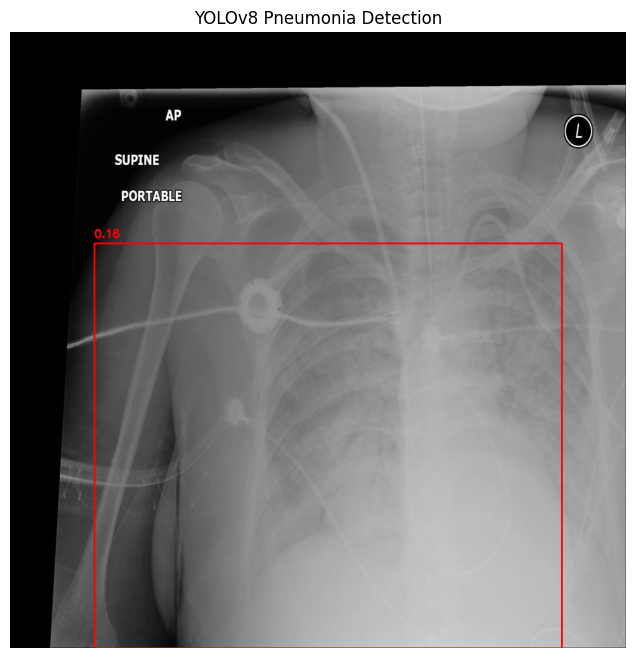

In [5]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# === Load YOLOv8 Model ===
model_path = "runs/detect/train/weights/last.pt"  # Make sure this path is correct
model = YOLO(model_path)

# === Image Path to Test ===
image_path ="D:/rsna_dataset/rsna-pneumonia-detection-challenge/stage_2_train_images/165e4595-deeb-4910-b06b-89e2fba035f6.jpg"


# === Run Inference ===
results = model(image_path, conf=0.11)  # Increase confidence threshold if needed

# === Check if Any Boxes Are Detected ===
boxes = results[0].boxes
if boxes is not None and len(boxes) > 0:
    print(f"✅ Detected {len(boxes)} bounding box(es).")
    for i, box in enumerate(boxes):
        print(f"Box {i+1}:")
        print(" → Coordinates (x1, y1, x2, y2):", box.xyxy[0].cpu().numpy())
        print(" → Confidence:", float(box.conf[0]))
else:
    print("❌ No bounding boxes detected.")

# === Load Image Using OpenCV ===
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# === Draw Bounding Boxes ===
if boxes is not None and len(boxes) > 0:
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].int().tolist()
        conf = box.conf.item()
        cv2.rectangle(img, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(img, f"{conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# === Display the Image with Bounding Boxes ===
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("YOLOv8 Pneumonia Detection")
plt.show()


In [8]:
import torch
from torchvision import models, transforms
import torch.nn as nn
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load DenseNet121 model (pre-trained on ImageNet)
model = models.densenet121(weights='IMAGENET1K_V1')

# Modify the classifier to match your number of classes (Normal, Pneumonia)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 2)  # Adjust for 2 classes

# Load the model weights (make sure the model was trained with this architecture)
model_path = 'D:/rsna_dataset/checkpoints/best_model.pth'
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

# Image preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match DenseNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet norms
])

# Function to load and preprocess an image
def process_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

# Function for running inference
def run_inference(image_path):
    image = process_image(image_path)
    image = image.to('cuda' if torch.cuda.is_available() else 'cpu')

    # Inference
    with torch.no_grad():
        output = model(image)
    
    # Get probabilities and predicted class
    probabilities = F.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    predicted_prob = probabilities[0][predicted_class].item()

    # Output prediction
    class_label = "Pneumonia" if predicted_class == 1 else "Normal"
    print(f"Prediction: {class_label} with probability {predicted_prob:.4f}")

    # Show the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Run inference on a sample image
image_path = 'D:/rsna_dataset/rsna-pneumonia-detection-challenge/stage_2_train_images/165e4595-deeb-4910-b06b-89e2fba035f6.jpg'  # Replace with your image path
run_inference(image_path)
D:/rsna_dataset/rsna-pneumonia-detection-challenge/stage_2_train_images/165e4595-deeb-4910-b06b-89e2fba035f6.jpgD:/rsna_dataset/rsna-pneumonia-detection-challenge/stage_2_train_images/165e4595-deeb-4910-b06b-89e2fba035f6.jpg

SyntaxError: invalid decimal literal (2035143153.py, line 63)

In [19]:
import torch
from pipeline_code.model import get_densenet121  # Import the correct model

# 1. Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. Initialize model
model = get_densenet121(num_classes=2)  # Define the model architecture

# 3. Load the weights (use strict=False to ignore non-matching keys)
checkpoint = torch.load('D:/rsna_dataset/checkpoints/best_model.pth', map_location=device)
model.load_state_dict(checkpoint, strict=False)

# 4. Move model to device
model = model.to(device)

# 5. Set model to evaluation mode
model.eval()

print("Model loaded successfully.")


Model loaded successfully.


In [7]:
import torch
from pipeline_code.model import get_densenet121
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
import os

# ========== Configuration ==========
# Paths
yolo_model_path = 'D:/rsna_dataset/runs/detect/train/weights/best.pt'  # Your trained YOLOv8 model path
densenet_model_path = 'D:/rsna_dataset/checkpoints/best_model.pth'  # Your DenseNet121 weights path
test_image_path = 'D:/rsna_dataset/rsna-pneumonia-detection-challenge/stage_2_train_images/97cd19cb-73b1-47df-b60f-380d44fc0ec9.jpg'  # Your input image path

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class Names
class_names = ['Normal', 'Pneumonia']

# ========== 1. Run YOLOv8 Detection ==========

print("🔍 Running YOLOv8 detection...")

yolo_model = YOLO(yolo_model_path)
yolo_results = yolo_model.predict(source=test_image_path, save=True, conf=0.22)

# Check detections
detections = yolo_results[0].boxes  # Boxes for first image
if detections.shape[0] == 0:
    print("⚠️ No pneumonia region detected by YOLOv8.")
else:
    print(f"✅ YOLOv8 detected {detections.shape[0]} pneumonia region(s).")

# ========== 2. Load DenseNet121 Classifier ==========

print("🧠 Loading DenseNet121 model...")

# Initialize model
classifier = get_densenet121(num_classes=2)
# Load weights
checkpoint = torch.load(densenet_model_path, map_location=device)
classifier.load_state_dict(checkpoint, strict=False)
classifier = classifier.to(device)
classifier.eval()

print("✅ DenseNet121 model loaded successfully.")

# ========== 3. Preprocess the Image for Classification ==========

print("🛠️ Preprocessing image for classification...")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

image = Image.open(test_image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0).to(device)

# ========== 4. DenseNet121 Prediction ==========

print("🧠 Running DenseNet121 classification...")

with torch.no_grad():
    output = classifier(input_tensor)
    pred_idx = torch.argmax(output, dim=1).item()
    prediction = class_names[pred_idx]

print(f"🩺 Final Diagnosis by DenseNet121: {prediction}")

# ========== 5. Summary ==========

if detections.shape[0] == 0 and prediction == 'Normal':
    print("📋 Final Result: No pneumonia detected (Normal X-ray).")
elif detections.shape[0] > 0 or prediction == 'Pneumonia':
    print("📋 Final Result: Pneumonia detected!")
else:
    print("📋 Final Result: Inconclusive. Please review manually.")

print("✅ Inference pipeline completed successfully.")


🔍 Running YOLOv8 detection...

image 1/1 D:\rsna_dataset\rsna-pneumonia-detection-challenge\stage_2_train_images\97cd19cb-73b1-47df-b60f-380d44fc0ec9.jpg: 640x640 (no detections), 83.4ms
Speed: 6.9ms preprocess, 83.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5
⚠️ No pneumonia region detected by YOLOv8.
🧠 Loading DenseNet121 model...
✅ DenseNet121 model loaded successfully.
🛠️ Preprocessing image for classification...
🧠 Running DenseNet121 classification...
🩺 Final Diagnosis by DenseNet121: Pneumonia
📋 Final Result: Pneumonia detected!
✅ Inference pipeline completed successfully.


In [2]:
import pydicom
import numpy as np
from PIL import Image
import os

# === Input DICOM path ===
dicom_path = r"D:\rsna_dataset\rsna-pneumonia-detection-challenge\stage_2_train_images\011d6f51-b732-4d45-a84d-90477325ef2d.dcm"

# === Output JPG path ===
output_jpg_path = dicom_path.replace(".dcm", ".jpg")

# === Read the DICOM file ===
dicom = pydicom.dcmread(dicom_path)

# === Get pixel array and normalize it ===
pixels = dicom.pixel_array.astype(np.float32)

# Normalize to range 0–255
pixels -= pixels.min()
pixels /= pixels.max()
pixels *= 255.0

# Convert to uint8 and to PIL image
pixels_uint8 = pixels.astype(np.uint8)
image = Image.fromarray(pixels_uint8)

# === Save as JPG ===
image.save(output_jpg_path)
print(f"✅ JPG saved at: {output_jpg_path}")


✅ JPG saved at: D:\rsna_dataset\rsna-pneumonia-detection-challenge\stage_2_train_images\011d6f51-b732-4d45-a84d-90477325ef2d.jpg


In [8]:
import pandas as pd
import os

# Example prediction results
# You can fill this list during your inference loop
predictions = [
    {
        "Image": "D:\rsna_dataset\rsna-pneumonia-detection-challenge\stage_2_train_images\97cd19cb-73b1-47df-b60f-380d44fc0ec9.jpg",
        "YOLO_Detection": "No",  # Yes/No depending on YOLO detection
        "DenseNet121_Prediction": "Pneumonia",  # or "Normal"
        "Final_Diagnosis": "Pneumonia"
    }
]

# Create DataFrame
df = pd.DataFrame(predictions)

# Create a folder if not exists
output_folder = 'inference_reports'
os.makedirs(output_folder, exist_ok=True)

# Save to CSV
csv_path = os.path.join(output_folder, 'predictions_report.csv')
df.to_csv(csv_path, index=False)

print(f"✅ Predictions saved to {csv_path}")


✅ Predictions saved to inference_reports\predictions_report.csv
